In [1]:
import scanpy as sc
import pandas as pd
import pandas as pd
from matplotlib import rcParams
from matplotlib import style
import matplotlib.pyplot as plt
import scirpy as ir
import anndata
sc.settings.verbosity = 3

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = 16,14
pd.set_option('display.max_columns', None) 


In [3]:
tp1 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t1.h5ad')
tp2 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t2.h5ad')
tp3 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t3.h5ad')
tp4 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t4.h5ad')
tp5 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t5.h5ad')
tp6 = sc.read_h5ad('/home/matthew/Research/HL_PD1/tcell_subsets/t6.h5ad')

print(tp1)
print(tp2)
print(tp3)
print(tp4)
print(tp5)
print(tp6)

AnnData object with n_obs × n_vars = 1061 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 1380 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 1910 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1'
    var: 'name'

In [4]:
tp1.obs['Timepoint'] = '1'
tp2.obs['Timepoint'] = '2'
tp3.obs['Timepoint'] = '3'
tp4.obs['Timepoint'] = '4'
tp5.obs['Timepoint'] = '5'
tp6.obs['Timepoint'] = '6'

tp1.obs['Disease_status'] = 'HL'
tp2.obs['Disease_status'] = 'Remission'
tp3.obs['Disease_status'] = 'Remission'
tp4.obs['Disease_status'] = 'Relapse'
tp5.obs['Disease_status'] = 'Relapse'
tp6.obs['Disease_status'] = 'Relapse'

tp1.obs['Pembrolizumab'] = 'No'
tp2.obs['Pembrolizumab'] = 'Yes'
tp3.obs['Pembrolizumab'] = 'Yes'
tp4.obs['Pembrolizumab'] = 'No'
tp5.obs['Pembrolizumab'] = 'Yes'
tp6.obs['Pembrolizumab'] = 'No'

tp1.obs['iRAE'] = 'No'
tp2.obs['iRAE'] = 'Yes'
tp3.obs['iRAE'] = 'No'
tp4.obs['iRAE'] = 'No'
tp5.obs['iRAE'] = 'Yes'
tp6.obs['iRAE'] = 'No'



In [5]:
tp1_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/151231_T-cell_D1000_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp2_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/160411_T-cell_D1003_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp3_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/161962_T-cell_D1004_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp4_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/171094_T-cell_D1001_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp5_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/171642_T-cell_D1005_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

tp6_tcr = ir.io.read_10x_vdj(
    "/home/matthew/datatransfer/vdj/trial_2/180251_T-cell_D1002_cellranger_vdj_v2p2p0_refdata-cellranger-vdj-GRCh38-alts-ensembl-2_0_0.outs/all_contig_annotations.json"
)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categ

In [6]:
#function to fix tcr dataframe so we can merge
def fixTcrDF(obj,timepoint,suffix):
    obj.obs['cell_id'] = obj.obs.index
    obj.obs
    obj.obs['cell_id'] = obj.obs['cell_id'].str.replace(suffix, '')
    obj.obs['cell_id'] = timepoint + obj.obs['cell_id'].astype(str)
    obj.obs.index = obj.obs['cell_id']
    obj.obs
    return obj




In [7]:
tp1_tcr = fixTcrDF(tp1_tcr,"Timepoint_1_",'_1')
tp2_tcr = fixTcrDF(tp2_tcr,"Timepoint_2_",'_2')
tp3_tcr = fixTcrDF(tp3_tcr,"Timepoint_3_",'_3')
tp4_tcr = fixTcrDF(tp4_tcr,"Timepoint_4_",'_4')
tp5_tcr = fixTcrDF(tp5_tcr,"Timepoint_5_",'_5')
tp6_tcr = fixTcrDF(tp6_tcr,"Timepoint_6_",'_6')

In [8]:
tp1_tcr.obs

multi_chain IR_VJ_1_locus IR_VJ_2_locus  \
cell_id                                                                   
Timepoint_1_AAACCTGAGAGAGCTC-1        False           NaN           NaN   
Timepoint_1_AAACCTGGTGTTTGGT-1        False           NaN           NaN   
Timepoint_1_AAACGGGTCTTGCCGT-1        False           NaN           NaN   
Timepoint_1_AAAGATGAGTCCAGGA-1        False           NaN           NaN   
Timepoint_1_AAAGATGCATCACGTA-1        False           NaN           NaN   
...                                     ...           ...           ...   
Timepoint_1_TTTGCGCGTTCCACGG-1        False           TRA           NaN   
Timepoint_1_TTTGCGCTCAGTGCAT-1        False           NaN           NaN   
Timepoint_1_TTTGGTTAGTTCGCAT-1        False           TRA           NaN   
Timepoint_1_TTTGGTTTCACTATTC-1        False           NaN           NaN   
Timepoint_1_TTTGTCAGTGCAACTT-1        False           TRA           NaN   

                               IR_VDJ_1_locus IR_VDJ_2_locus    IR_VJ_1_cdr3  \
cell_id                                                                        
Timepoint_1_AAACCTGAGAGAGCTC-1            NaN            NaN            None   
Timepoint_1_AAACCTGGTGTTTGGT-1            NaN            NaN            None   
Timepoint_1_AAACGGGTCTTGCCGT-1            NaN            NaN            None   
Timepoint_1_AAAGATGAGTCCAGGA-1            TRB            NaN            None   
Timepoint_1_AAAGATGCATCACGTA-1            NaN            NaN            None   
...                                       ...            ...             ...   
Timepoint_1_TTTGCGCGTTCCACGG-1            TRB            NaN     CIAQGAQKLVF   
Timepoint_1_TTTGCGCTCAGTGCAT-1            TRB            NaN            None   
Timepoint_1_TTTGGTTAGTTCGCAT-1            TRB            NaN  CATDDWGGADGLTF   
Timepoint_1_TTTGGTTTCACTATTC-1            NaN            NaN            None   
Timepoint_1_TTTGTCAGTGCAACTT-1            TRB            NaN     CATDAINDMRF   

                               IR_VJ_2_cdr3     IR_VDJ_1_cdr3 IR_VDJ_2_cdr3  \
cell_id                                                                       
Timepoint_1_AAACCTGAGAGAGCTC-1         None              None          None   
Timepoint_1_AAACCTGGTGTTTGGT-1         None              None          None   
Timepoint_1_AAACGGGTCTTGCCGT-1         None              None          None   
Timepoint_1_AAAGATGAGTCCAGGA-1         None  CASSYEDSPWGGEQFF          None   
Timepoint_1_AAAGATGCATCACGTA-1         None              None          None   
...                                     ...               ...           ...   
Timepoint_1_TTTGCGCGTTCCACGG-1         None   CSADLAGGAKNIQYF          None   
Timepoint_1_TTTGCGCTCAGTGCAT-1         None     CASSFSRSYEQYF          None   
Timepoint_1_TTTGGTTAGTTCGCAT-1         None      CASSEFGGELFF          None   
Timepoint_1_TTTGGTTTCACTATTC-1         None              None          None   
Timepoint_1_TTTGTCAGTGCAACTT-1         None    CASSLGGATDTQYF          None   

                                                           IR_VJ_1_cdr3_nt  \
cell_id                                                                      
Timepoint_1_AAACCTGAGAGAGCTC-1                                        None   
Timepoint_1_AAACCTGGTGTTTGGT-1                                        None   
Timepoint_1_AAACGGGTCTTGCCGT-1                                        None   
Timepoint_1_AAAGATGAGTCCAGGA-1                                        None   
Timepoint_1_AAAGATGCATCACGTA-1                                        None   
...                                                                    ...   
Timepoint_1_TTTGCGCGTTCCACGG-1           TGCATCGCCCAGGGAGCCCAGAAGCTGGTATTT   
Timepoint_1_TTTGCGCTCAGTGCAT-1                                        None   
Timepoint_1_TTTGGTTAGTTCGCAT-1  TGTGCTACGGACGACTGGGGAGGTGCTGACGGACTCACCTTT   
Timepoint_1_TTTGGTTTCACTATTC-1                                        None   
Timepoint_1_TTTGTCAGTGCAACTT-1           TGTGCTACGG

In [9]:
ir.pp.merge_with_ir(tp1, tp1_tcr)
ir.pp.merge_with_ir(tp2, tp2_tcr)
ir.pp.merge_with_ir(tp3, tp3_tcr)
ir.pp.merge_with_ir(tp4, tp4_tcr)
ir.pp.merge_with_ir(tp5, tp5_tcr)
ir.pp.merge_with_ir(tp6, tp6_tcr)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' a

In [11]:
adatas = []
adatas.append(tp1)
adatas.append(tp2)
adatas.append(tp3)
adatas.append(tp4)
adatas.append(tp5)
adatas.append(tp6)

adata = adatas[0].concatenate(adatas[1:],index_unique=None)

In [33]:
adata.obs


Unnamed: 0  nCount_RNA  nFeature_RNA  \
0      Timepoint_1_AAACCTGAGAGAGCTC-1        3008          1184   
1      Timepoint_1_AAACCTGGTGTTTGGT-1        2711          1256   
2      Timepoint_1_AAACGGGTCTTGCCGT-1        1862           814   
3      Timepoint_1_AAAGATGAGTCCAGGA-1        4551          1369   
4      Timepoint_1_AAAGCAAAGGTGTGGT-1        2603          1056   
...                               ...         ...           ...   
10596  Timepoint_6_TTTGCGCTCATCTGTT-1        6837          2082   
10597  Timepoint_6_TTTGGTTCAAGTACCT-1        5310          1623   
10598  Timepoint_6_TTTGTCACAAGTTGTC-1        3303          1205   
10599  Timepoint_6_TTTGTCACAATTGCTG-1        2509          1180   
10600  Timepoint_6_TTTGTCACACATGGGA-1        4062          1449   

       log10GenesPerUMI  percent_mito  percent_ribo  percent_hb   S.Score  \
0              0.883584      6.781915     29.953457         0.0  0.034645   
1              0.902730      4.387906     24.151917         0.0  0.021716   
2              0.890105      5.209452     30.612245         0.0 -0.021759   
3              0.857384      5.251593     39.485827         0.0  0.047148   
4              0.885284      5.186323     26.584710         0.0 -0.045752   
...                 ...           ...           ...         ...       ...   
10596          0.865425      8.363796     25.851733         0.0 -0.024576   
10597          0.861809      1.713748     38.681733         0.0  0.090187   
10598          0.875552      1.877081     36.845292         0.0  0.054811   
10599          0.903627      7.532882     18.573137         0.0 -0.009382   
10600          0.875948      2.461841     32.939439         0.0  0.069706   

       G2M.Score Phase  nCount_SCT  nFeature_SCT  integrated_snn_res.0.8  \
0       0.068198   G2M        3409          1181                       2   
1       0.025207   G2M        3287          1253                       5   
2      -0.014021    G1        3266           838                       1   
3      -0.018358     S        3996          1366                       2   
4       0.065598   G2M        3311          1057                       3   
...          ...   ...         ...           ...                     ...   
10596   0.046420   G2M        4022          1860                       1   
10597   0.007137     S        3799          1592                      10   
10598  -0.038137     S        3288          1201                       2   
10599  -0.069536    G1        2889          1179                       2   
10600   0.036985     S        3585          1445                       7   

       seurat_clusters   new.ident  integrated_snn_res.1  Timepoint  \
0                    3     CD4 TH2                     1          1   
1                    4   CD8 TCM-1                     5          1   
2                    1   CD8 TEM-1                     2          1   
3                    3     CD4 TH2                     1          1   
4                    2   CD8 TEM-2                     3          1   
...                ...         ...                   ...        ...   
10596               11  CD8 TEFF-2                    13          6   
10597               10     CD4 TCM                    10          6   
10598                3     CD4 TH2                     1          6   
10599                3     CD4 TH2                     1          6   
10600                6    CD4 TH17                     6          6   

      Disease_status Pembrolizumab iRAE                         cell_id  \
0                 HL            No   No  Timepoint_1_AAACCTGAGAGAGCTC-1   
1                 HL            No   No  Timepoint_1_AAACCTGGTGTTTGGT-1   
2                 HL            No   No  Timepoint_1_AAACGGGTCTTGCCGT-1   
3                 HL            No   No  Timepoint_1_AAAGATGAGTCCAGGA-1   
4                 HL            No   No  Timepoint_1_AAAGCAAAGGTGTGGT-1   
...              ...           ...  ...                             ...   
10596 

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_2_expr' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR

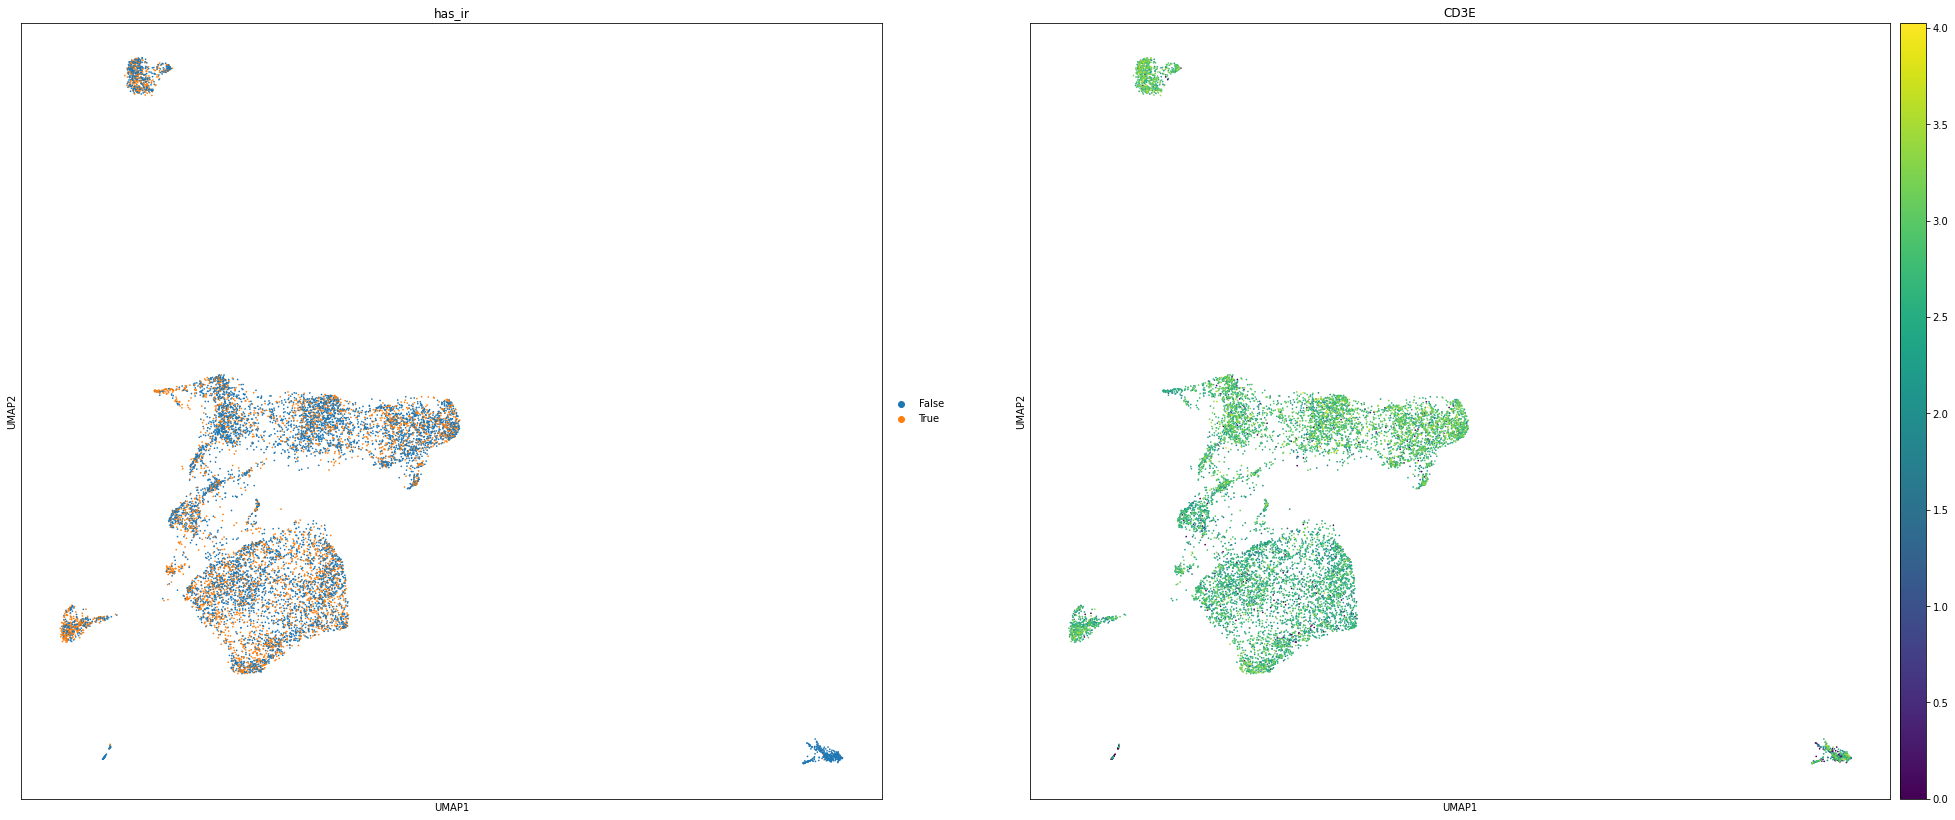

In [13]:
sc.pl.umap(adata, color=["has_ir", "CD3E"])

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


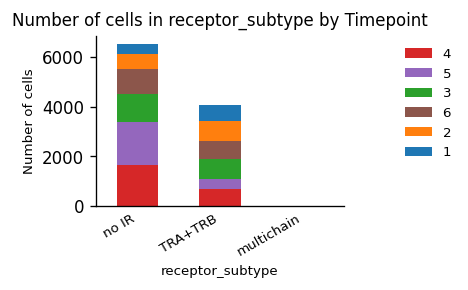

In [14]:
#qc

ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="Timepoint")

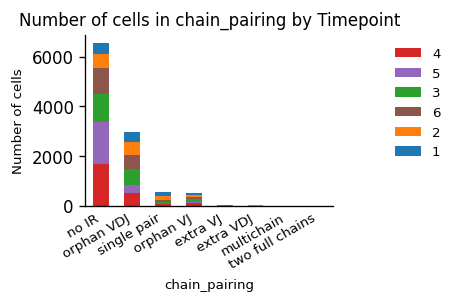

In [15]:
ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="Timepoint")

In [16]:
#receptor_arms="any"
#receptor_arms="all"
ir.pp.ir_neighbors(adata, receptor_arms="all", dual_ir="primary_only")

100%|██████████| 131255/131255 [00:00<00:00, 167279.76it/s]


In [17]:
ir.tl.define_clonotypes(adata)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'clonotype' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1feb7416d8>],
      dtype=object)

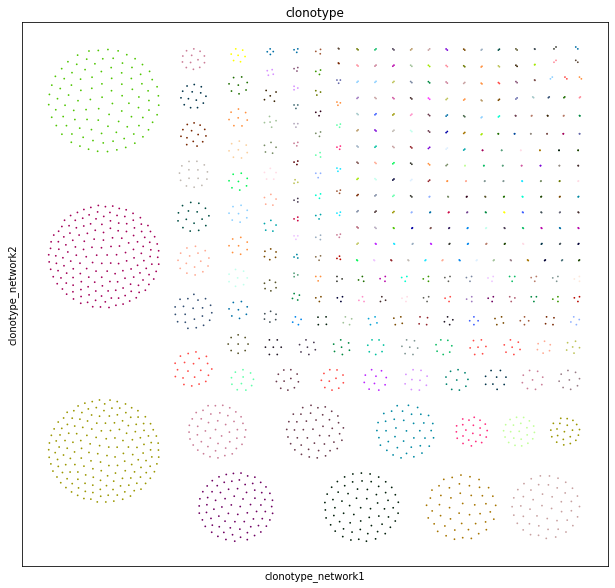

In [18]:
ir.tl.clonotype_network(adata, min_size=2)
ir.pl.clonotype_network(adata, color="clonotype", legend_loc="none")

In [19]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
    receptor_arms="all",
    dual_ir="all",
)
ir.tl.define_clonotype_clusters(
    adata, partitions="connected", sequence="aa", metric="alignment", within_group=None
)

ir.tl.clonotype_network(adata, min_size=4, sequence="aa", metric="alignment")

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
100%|██████████| 136/136 [00:00<00:00, 167.27it/s]
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
100%|██████████| 861/861 [00:05<00:00, 146.93it/s]
Finished computing VDJ pairwise distances. (0:00:06)
Started comstructing VJ coord-dictionary...
100%|██████████| 1180/1180 [00:00<00:00, 11397.43it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 3251/3251 [00:00<00:00, 10314.16it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 148843/148843 [00:00<00:00, 224204.36it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
    Started converting distances to connectivities. 
    Finished converting distances to connectivities.  (0:00:00)


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'ct_cluster_aa_alignment' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fe8e75a20>],
      dtype=object)

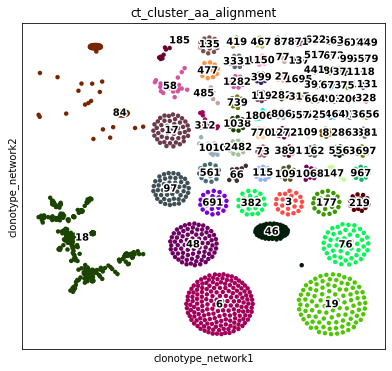

In [20]:
ir.pl.clonotype_network(
    adata,
    color="ct_cluster_aa_alignment",
    legend_fontoutline=3,
    size=80,
    panel_size=(6, 6),
    legend_loc="on data",
)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fe8e859b0>],
      dtype=object)

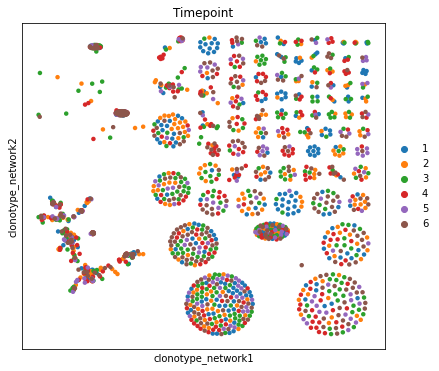

In [21]:
ir.pl.clonotype_network(adata, color="Timepoint", size=80, panel_size=(6, 6))


In [22]:
ir.tl.define_clonotype_clusters(
    adata,
    sequence="aa",
    metric="alignment",
    same_v_gene="primary_only",
    key_added="ct_cluster_aa_alignment_same_v",
)


In [23]:
ct_different_v = adata.obs.groupby("ct_cluster_aa_alignment").apply(
    lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1
)
ct_different_v = ct_different_v[ct_different_v].index.values
ct_different_v

['6', '18', '24', '38', '46', ..., '5836', '6739', '7250', '7667', '7742']
Length: 106
Categories (8569, object): ['0', '1', '2', '3', ..., '8565', '8566', '8567', '8568']

In [24]:
ir.tl.clonal_expansion(adata)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


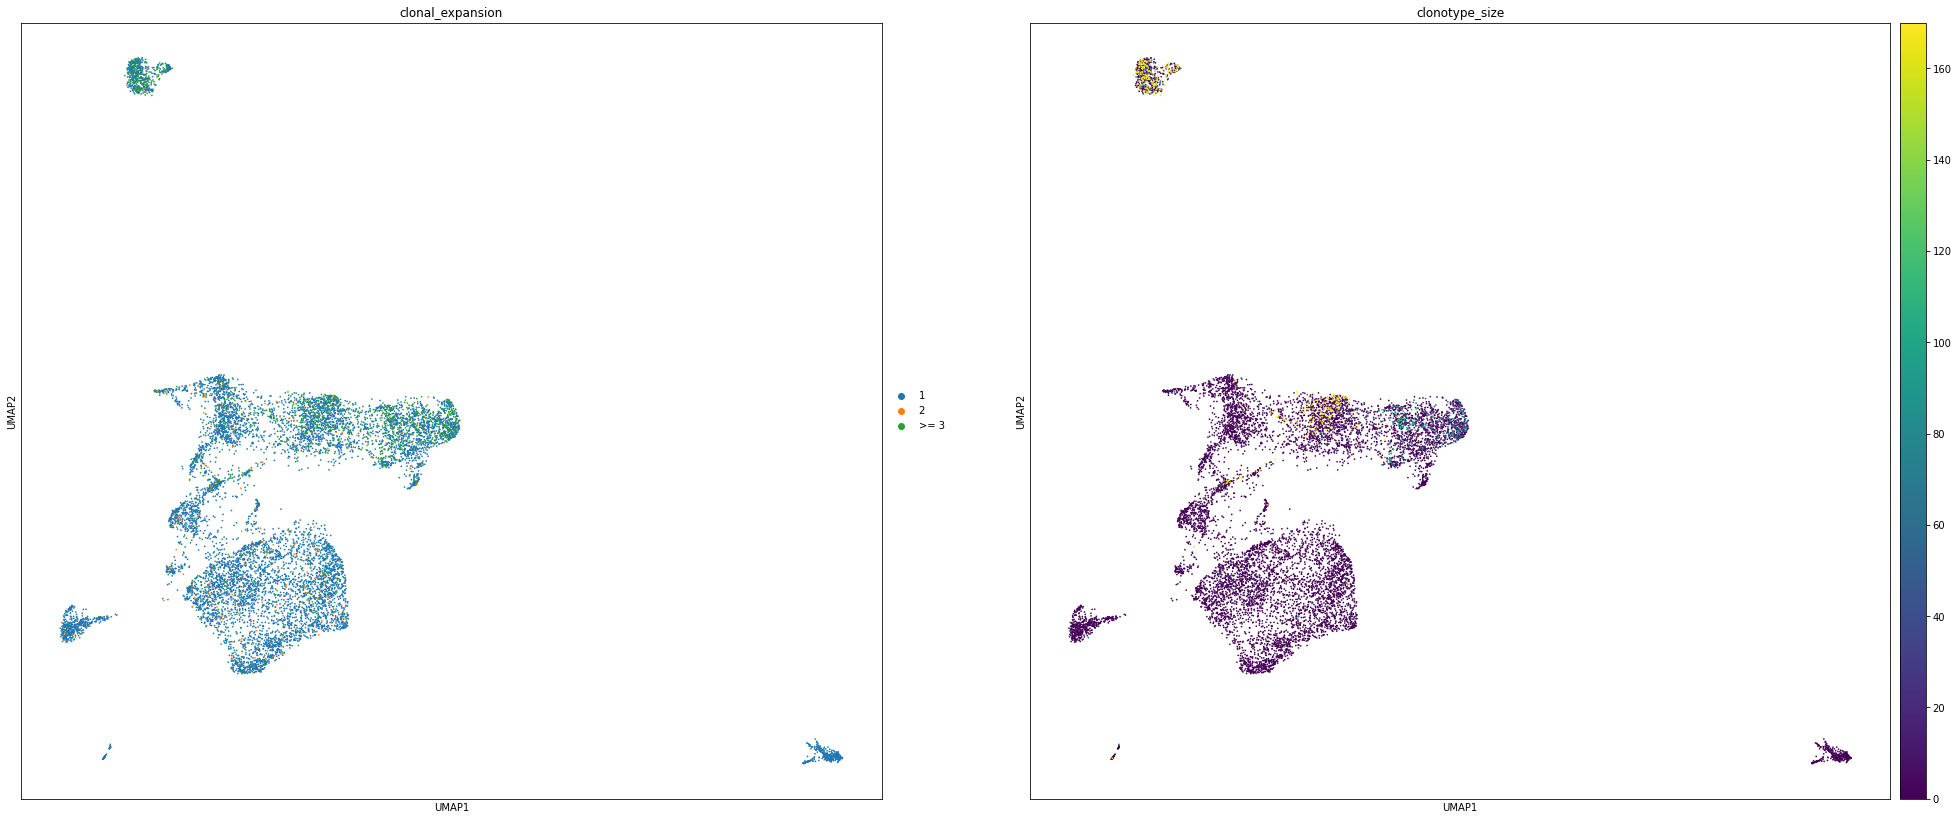

In [66]:
adata.obs.loc[adata.obs["has_ir"] == "False", "clonotype_size"] = 0

sc.pl.umap(adata, color=["clonal_expansion", "clonotype_size"])

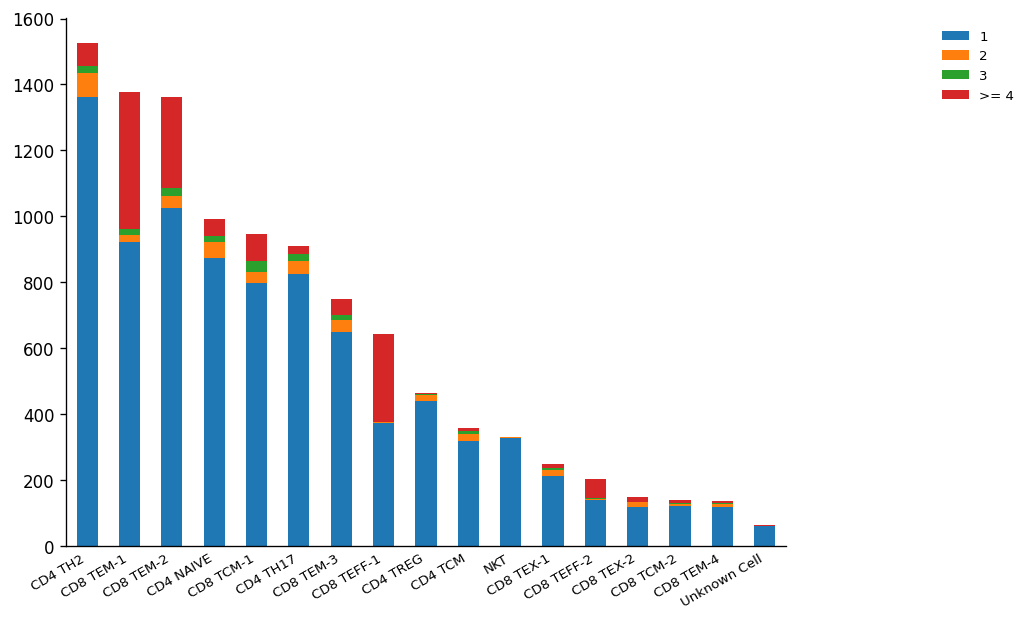

In [26]:
ir.pl.clonal_expansion(adata, groupby="new.ident", clip_at=4, normalize=False,figsize=(10,8))


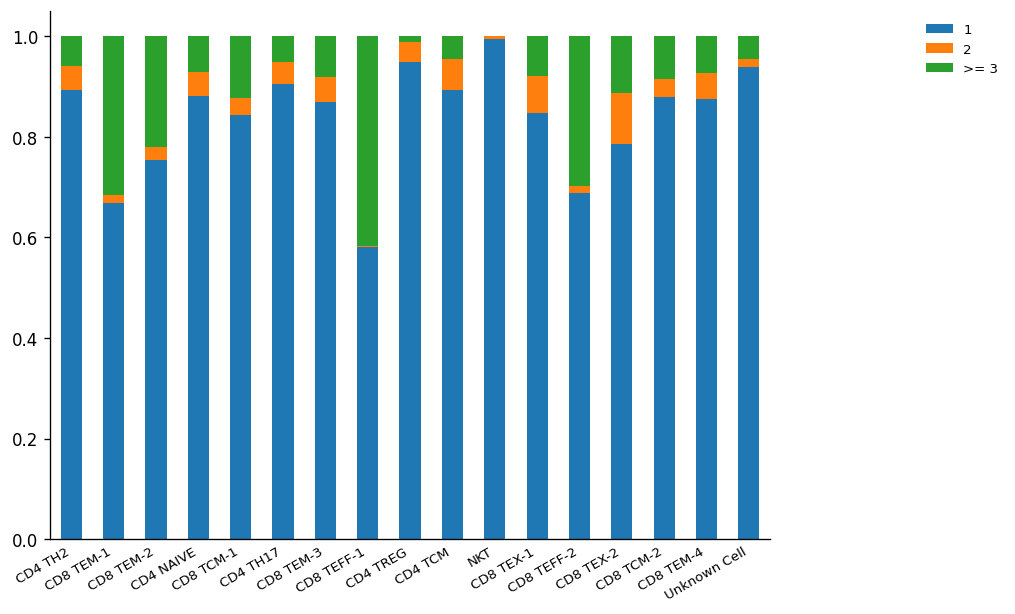

In [27]:
ir.pl.clonal_expansion(adata, "new.ident",figsize=(10,8))

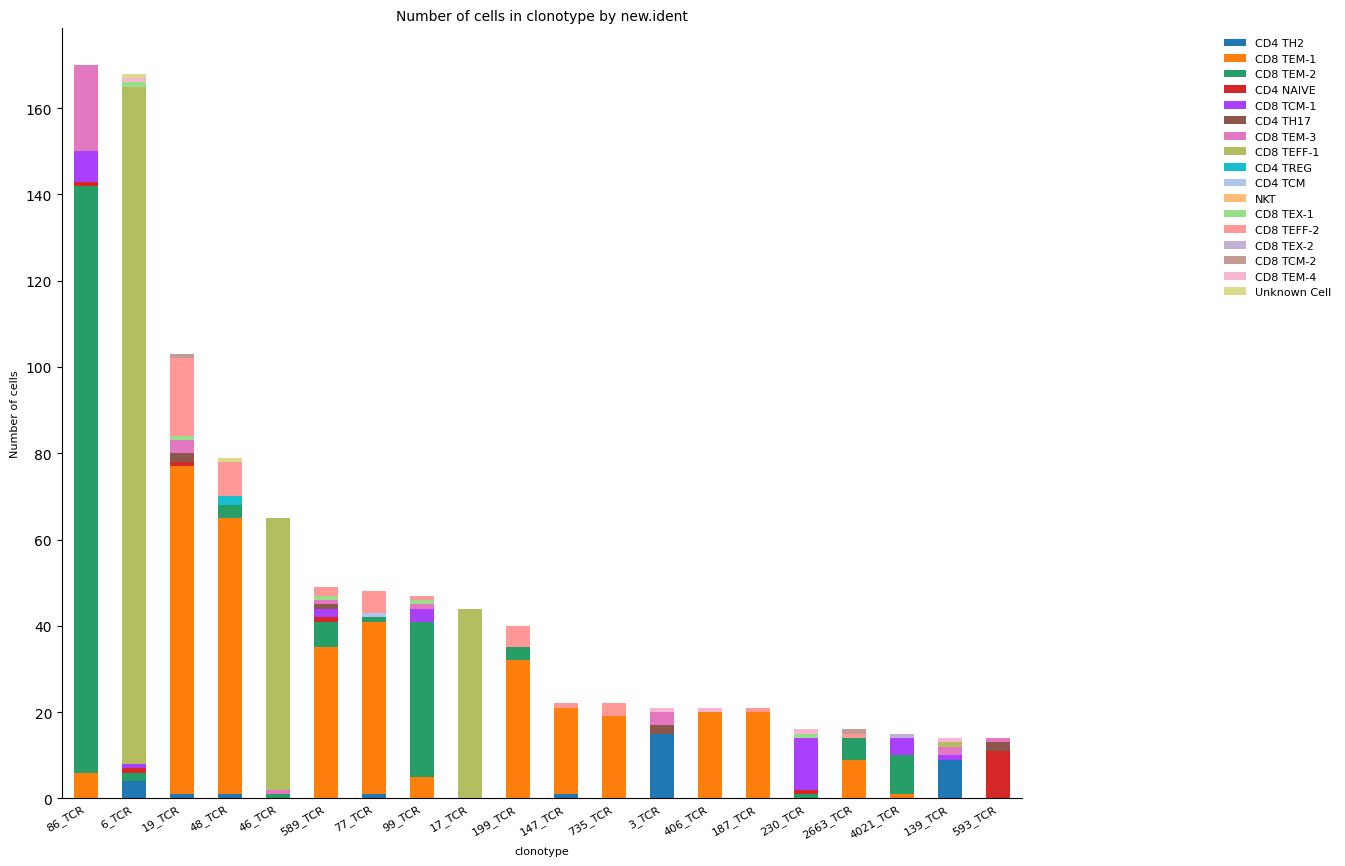

In [79]:
ir.pl.group_abundance(adata, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


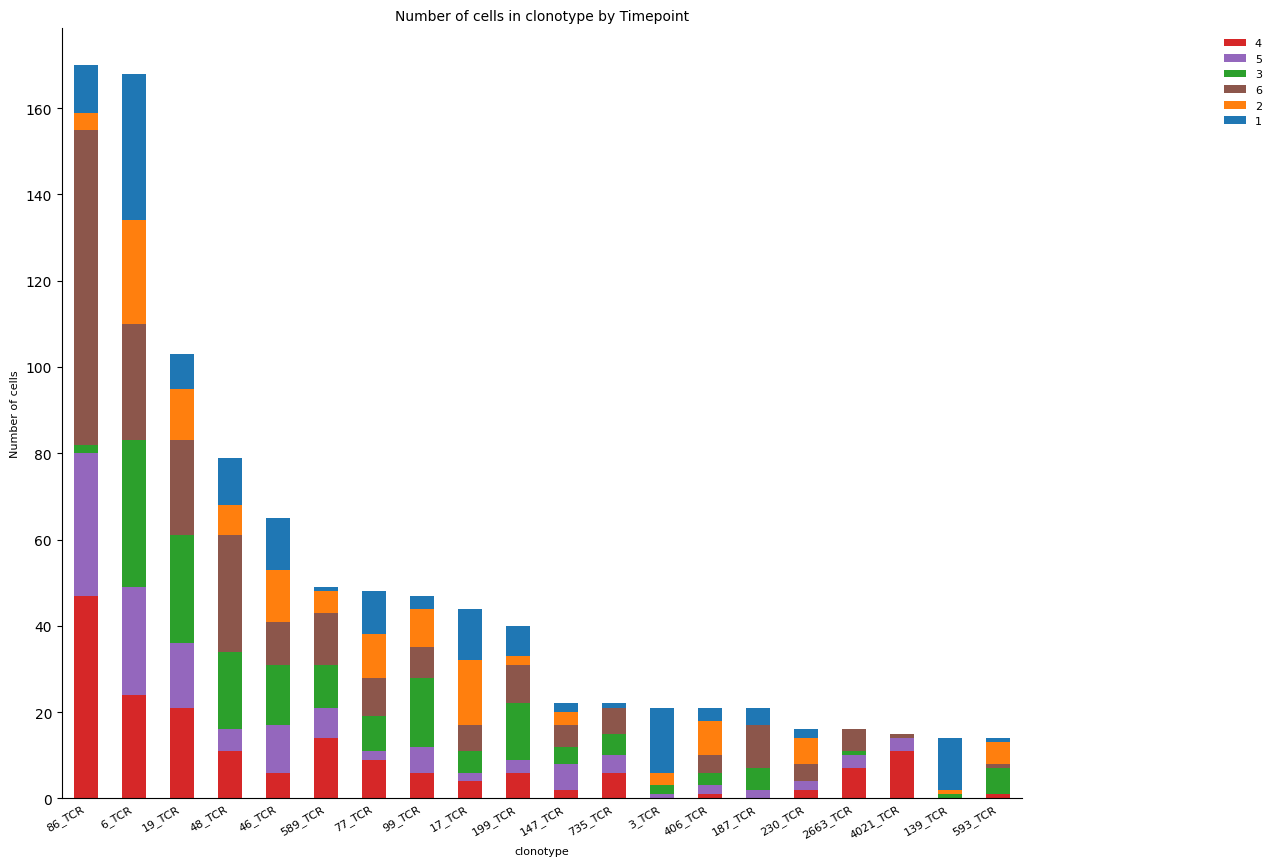

In [99]:
ir.pl.group_abundance(
    adata, groupby="clonotype", target_col="Timepoint", max_cols=20 ,fig_kws={"dpi": 100}
)

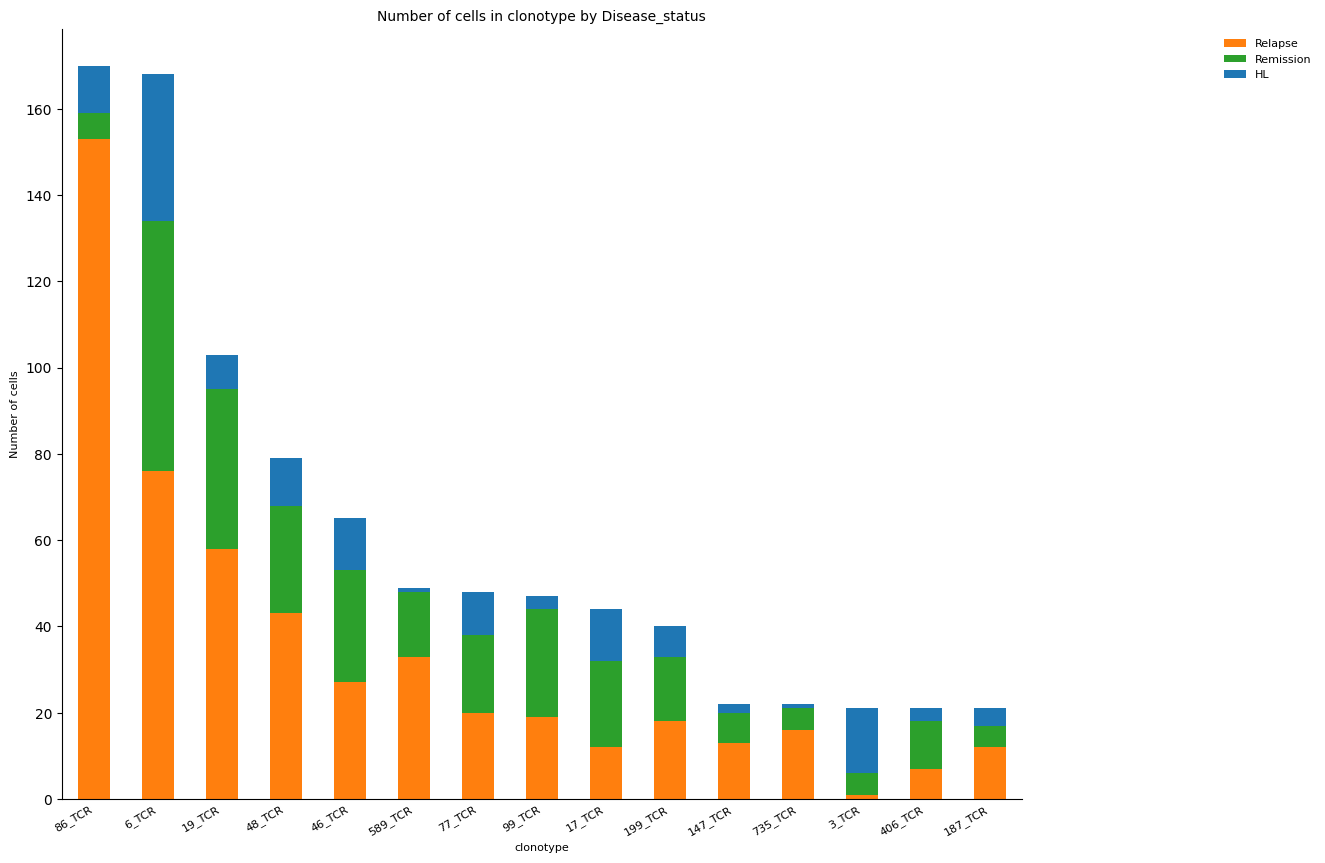

In [30]:
ax = ir.pl.group_abundance(
    adata, groupby="clonotype", target_col="Disease_status", max_cols=15, fig_kws={"dpi": 100}
)



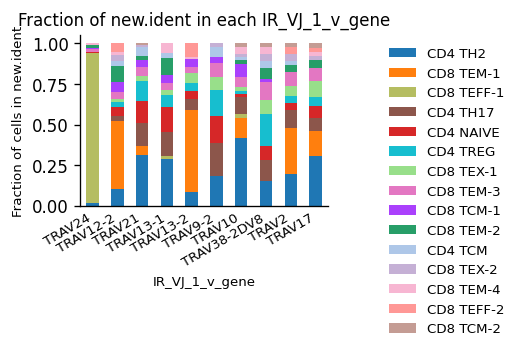

In [31]:
ir.pl.group_abundance(
    adata, groupby="IR_VJ_1_v_gene", target_col="new.ident", normalize=True, max_cols=10
)



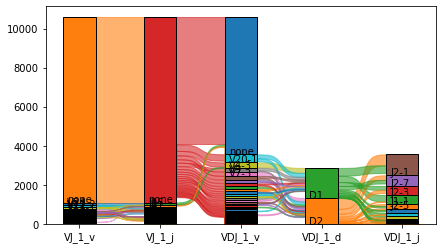

In [32]:
ir.pl.vdj_usage(adata, full_combination=False, max_segments=None, max_ribbons=30)

In [33]:
df, dst, lk = ir.tl.repertoire_overlap(adata, "Timepoint", inplace=False)
df.head()

clonotype  0_no IR  1_no IR  2_no IR  3_TCR  4_no IR  5_TCR  6_TCR  7_TCR  \
Timepoint                                                                   
1              1.0      1.0      1.0   15.0      1.0    1.0   34.0    1.0   
2              0.0      0.0      0.0    3.0      0.0    0.0   24.0    0.0   
3              0.0      0.0      0.0    2.0      0.0    0.0   34.0    0.0   
4              0.0      0.0      0.0    0.0      0.0    0.0   24.0    0.0   
5              0.0      0.0      0.0    1.0      0.0    0.0   25.0    0.0   

clonotype  8_TCR  9_TCR  10_TCR  11_TCR  12_no IR  13_no IR  14_no IR  15_TCR  \
Timepoint                                                                       
1            4.0    1.0     1.0     1.0       1.0       1.0       1.0     1.0   
2            1.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   
3            1.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   
4            0.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   
5            0.0    0.0     0.0     0.0       0.0       0.0       0.0     0.0   

clonotype  16_TCR  17_TCR  18_TCR  19_TCR  20_TCR  21_no IR  22_TCR  23_no IR  \
Timepoint                                                                       
1             1.0    12.0     1.0     8.0     1.0       1.0     1.0       1.0   
2             1.0    15.0     0.0    12.0     0.0       0.0     0.0       0.0   
3             0.0     5.0     0.0    25.0     0.0       0.0     0.0       0.0   
4             0.0     4.0     0.0    21.0     0.0       0.0     0.0       0.0   
5             0.0     2.0     0.0    15.0     0.0       0.0     0.0       0.0   

clonotype  24_TCR  25_TCR  26_no IR  27_TCR  28_no IR  29_no IR  30_TCR  \
Timepoint                                                                 
1             1.0     2.0       1.0     1.0       1.0       1.0     1.0   
2             0.0     1.0       0.0     0.0       0.0       0.0     0.0   
3             0.0     0.0       0.0     2.0       0.0       0.0     0.0   
4             0.0     0.0       0.0     0.0       0.0       0.0     0.0   
5             0.0     0.0       0.0     1.0       0.0       0.0     0.0   

clonotype  31_no IR  32_TCR  33_no IR  34_no IR  35_no IR  36_TCR  37_TCR  \
Timepoint                                                                   
1               1.0     1.0       1.0       1.0       1.0     2.0     1.0   
2               0.0     0.0       0.0       0.0       0.0     1.0     0.0   
3               0.0     0.0       0.0       0.0       0.0     1.0     0.0   
4               0.0     0.0       0.0       0.0       0.0     0.0     0.0   
5               0.0     0.0       0.0       0.0       0.0     0.0     0.0   

clonotype  38_TCR  39_TCR  40_no IR  41_no IR  42_no IR  43_no IR  44_no IR  \
Timepoint                                                                     
1             1.0     1.0       1.0       1.0       1.0       1.0       1.0   
2             0.0     0.0       0.0       0.0       0.0       0.0       0.0   
3             0.0     0.0       0.0       0.0       0.0       0.0       0.0   
4             0.0     0.0       0.0       0.0       0.0       0.0       0.0   
5             0.0     0.0       0.0       0.0       0.0       0.0       0.0   

clonotype  45_TCR  46_TCR  47_no IR  48_TCR  49_no IR  50_TCR  51_TCR  \
Timepoint                                                               
1             1.0    12.0       1.0    11.0       1.0     1.0     1.0   
2             0.0    12.0       0.0     7.0       0.0     0.0     0.0   
3             0.0    14.0       0.0    18.0       0.0     0.0     0.0   
4             0.0     6.0       0.0    11.0       0.0     0.0     0.0   
5             0.0    11.0       0.0     5.0       0.0     0.0     0.0   

clonotype  52_no IR  53_TCR  54_TCR  55_TCR  56_no IR  57_TCR  58_TCR  59_TCR  \
Timepoint                                                                       
1               1.0     1.0   

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


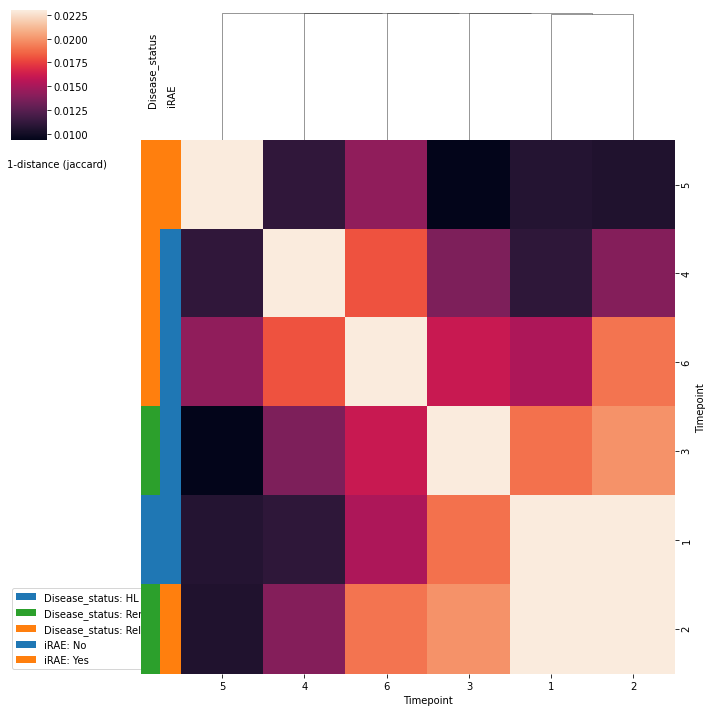

In [34]:
ir.pl.repertoire_overlap(adata, "Timepoint", heatmap_cats=["Disease_status","iRAE"],figsize=(14,10))

In [35]:
adata.obs.loc[adata.obs["has_ir"] == "False", "clonotype_size"] = 0

In [36]:
freq, stat = ir.tl.clonotype_imbalance(
    adata,
    replicate_col="Timepoint",
    groupby="new.ident",
    case_label="CD4 TH2",
    control_label="CD8 TEM-1",
    inplace=False,
)
top_differential_clonotypes = stat["clonotype"].tolist()[:5]

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


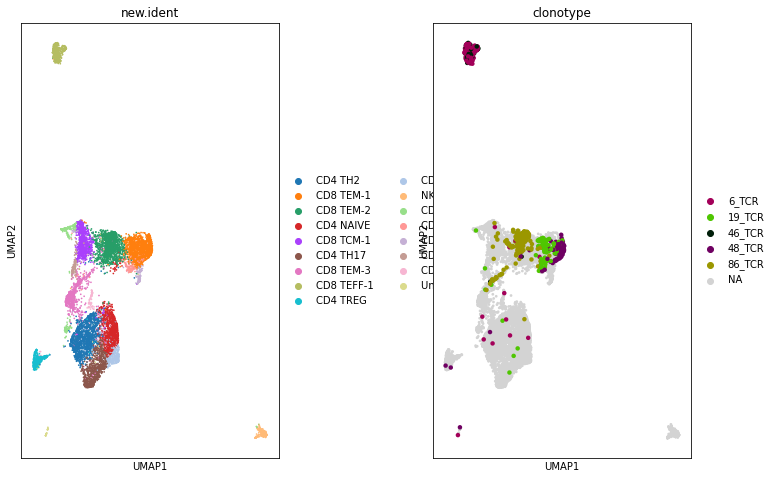

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="new.ident", ax=ax1, show=False)
sc.pl.umap(
    adata,
    color="clonotype",
    groups=top_differential_clonotypes,
    ax=ax2,
    # increase size of highlighted dots
    size=[
        80 if c in top_differential_clonotypes else 30 for c in adata.obs["clonotype"]
    ],
)

ranking genes
    consider 'clonotype' groups:
    with sizes: [168 170]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


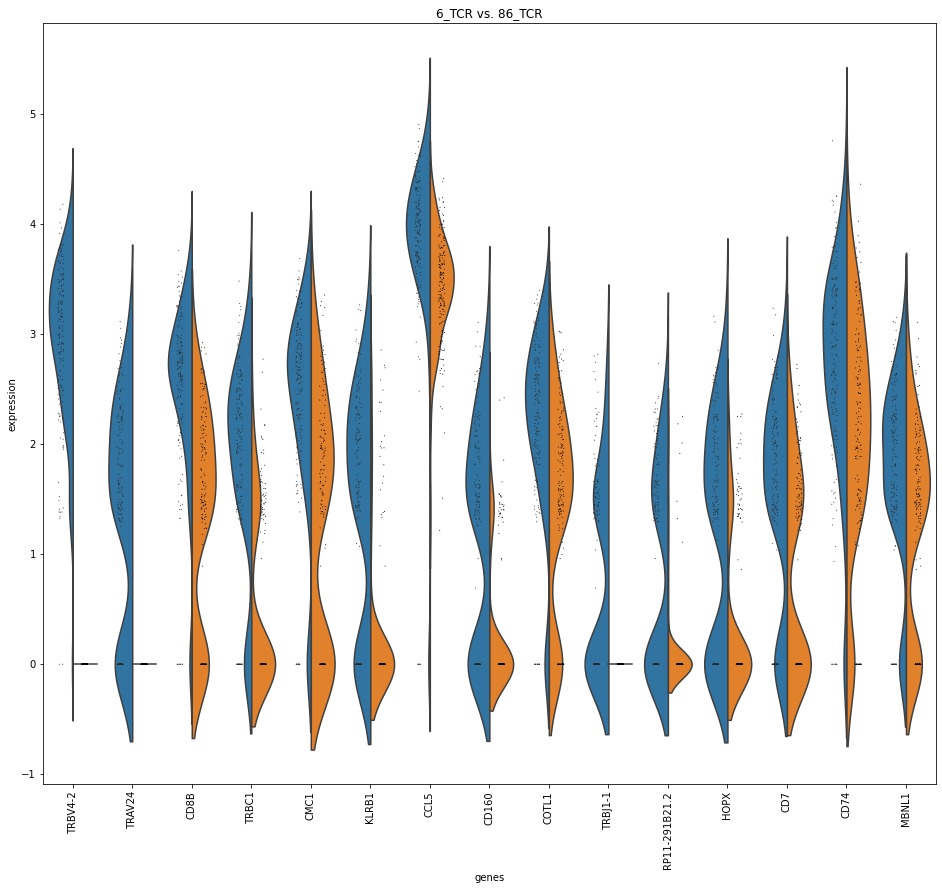

In [38]:
sc.tl.rank_genes_groups(
    adata, "clonotype", groups=["6_TCR"], reference="86_TCR", method="wilcoxon"
)
sc.pl.rank_genes_groups_violin(adata, groups="6_TCR", n_genes=15)



In [71]:
# save output to input back into seurat
adata.obs.to_csv("/home/matthew/Research/HL_PD1/tcell_subsets/tcr_analyzed.csv")

In [72]:
# plot for each timepoint
t1 = adata[adata.obs['Timepoint'].isin(['1'])]
t2 = adata[adata.obs['Timepoint'].isin(['2'])]
t3 = adata[adata.obs['Timepoint'].isin(['3'])]
t4 = adata[adata.obs['Timepoint'].isin(['4'])]
t5 = adata[adata.obs['Timepoint'].isin(['5'])]
t6 = adata[adata.obs['Timepoint'].isin(['6'])]



/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×1060

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


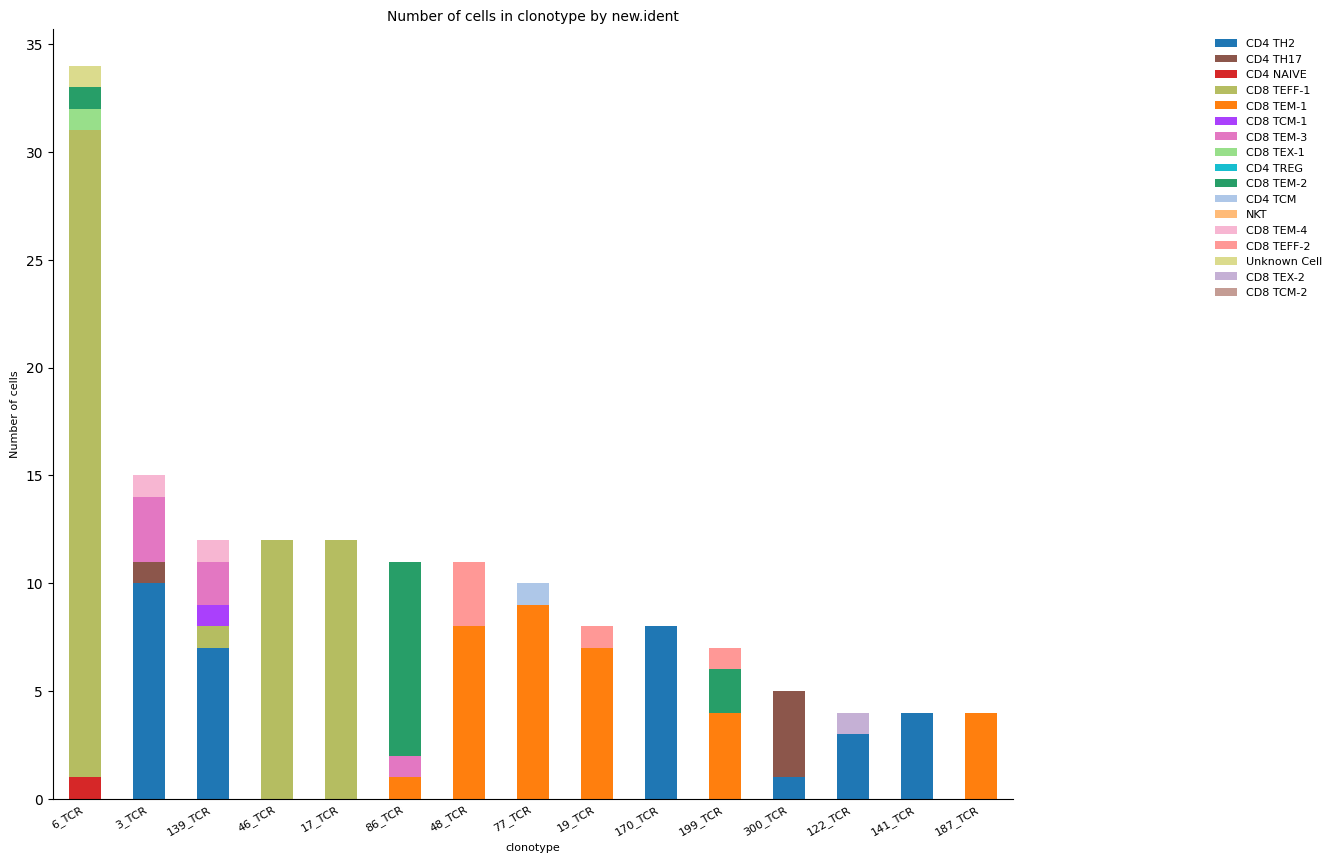

In [73]:
ir.pl.group_abundance(t1, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

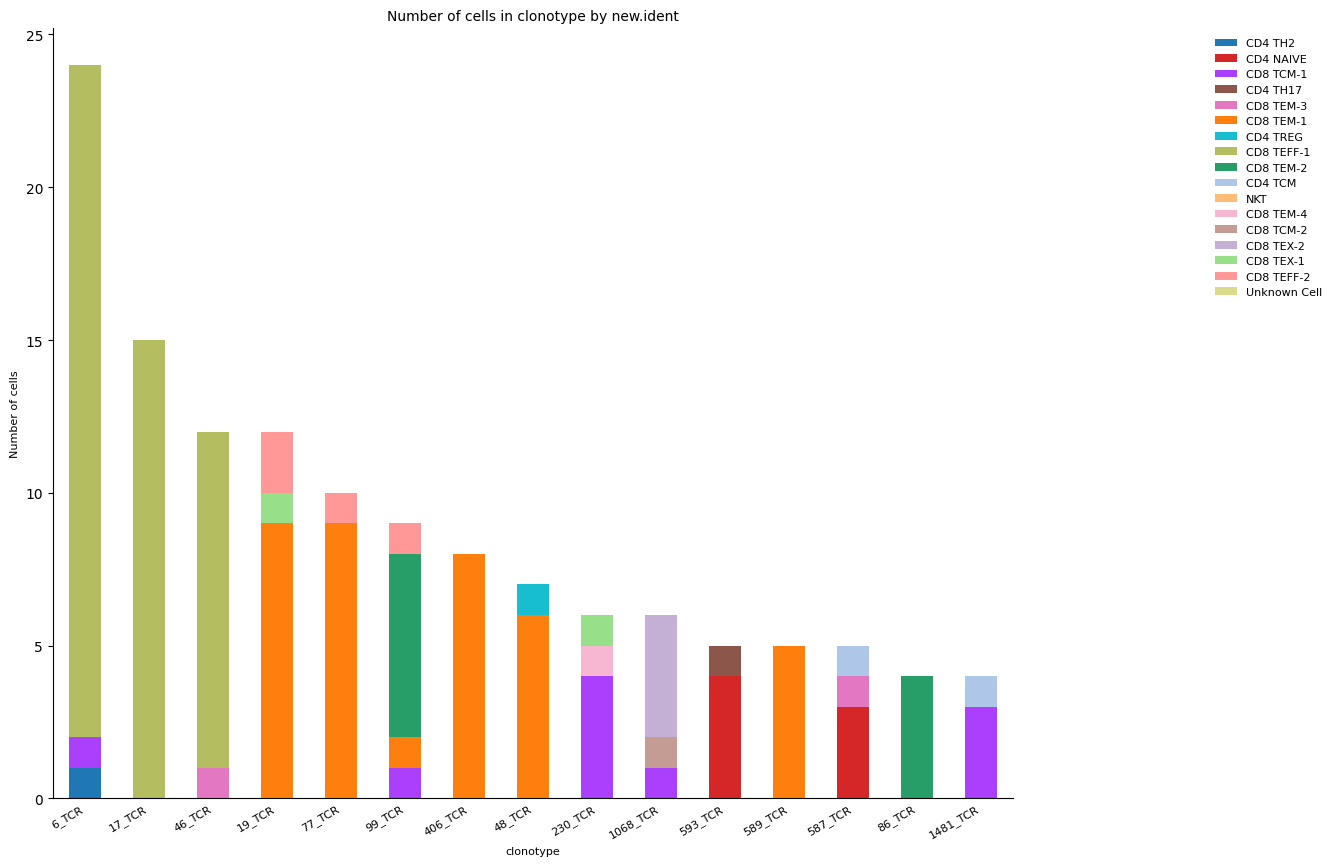

In [74]:
ir.pl.group_abundance(t2, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

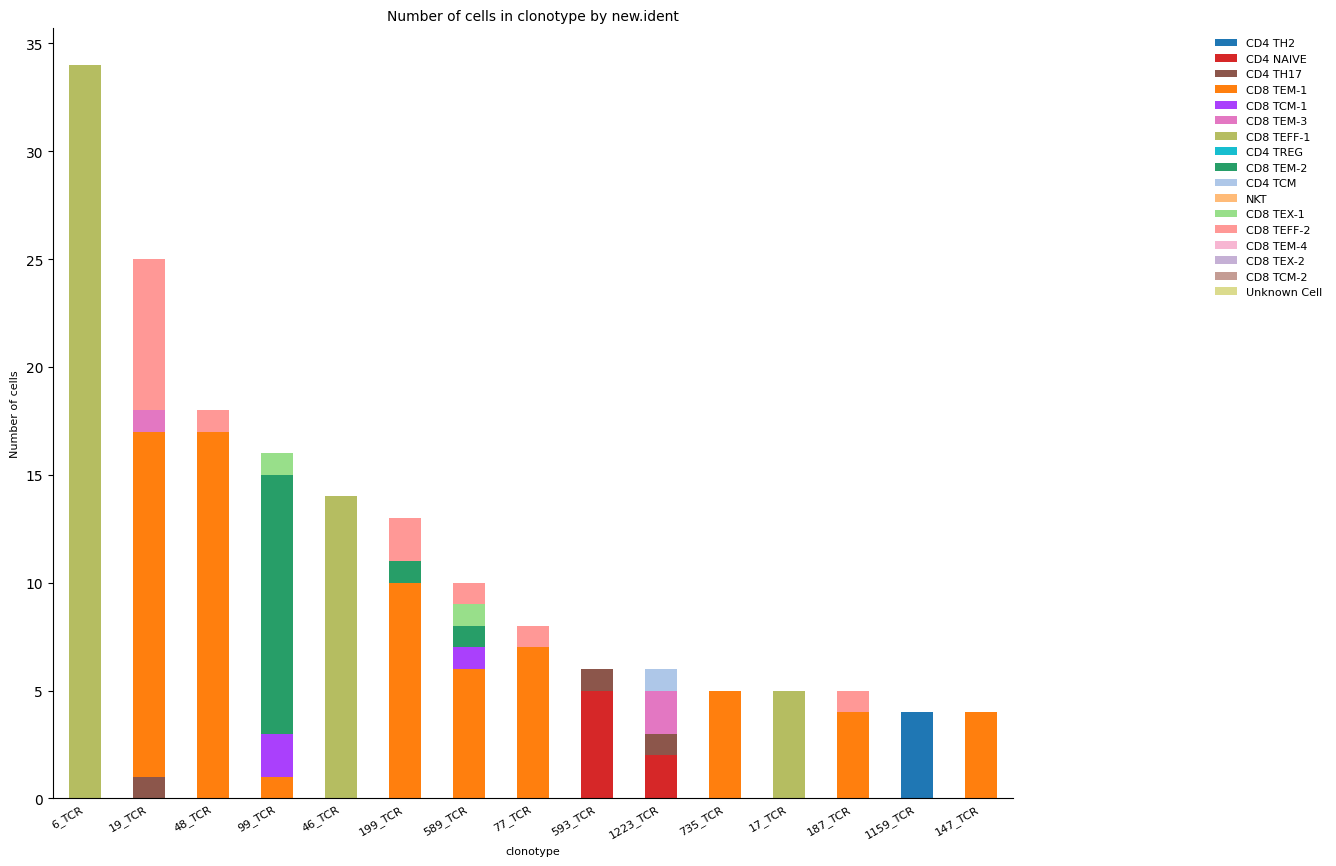

In [75]:
ir.pl.group_abundance(t3, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

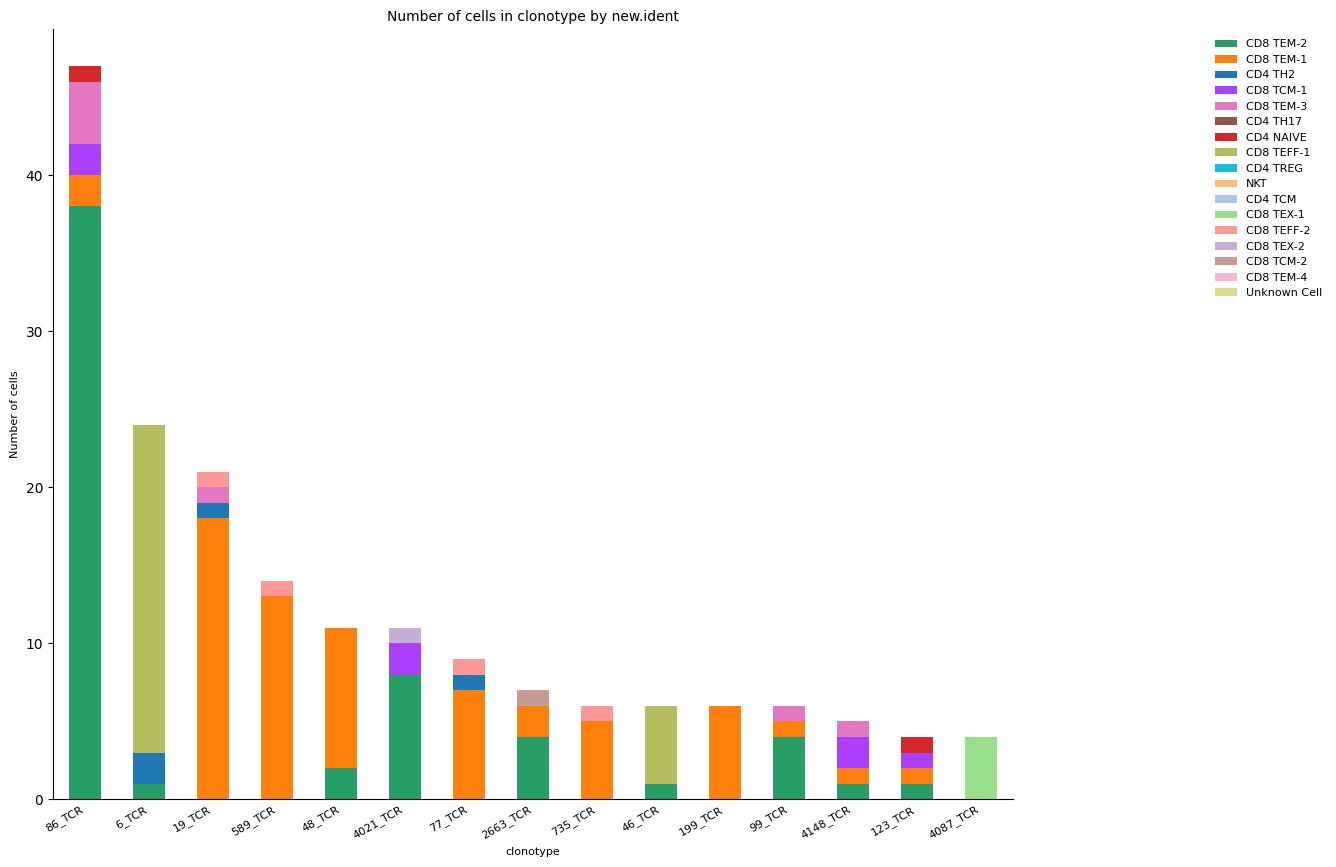

In [44]:
ir.pl.group_abundance(t4, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

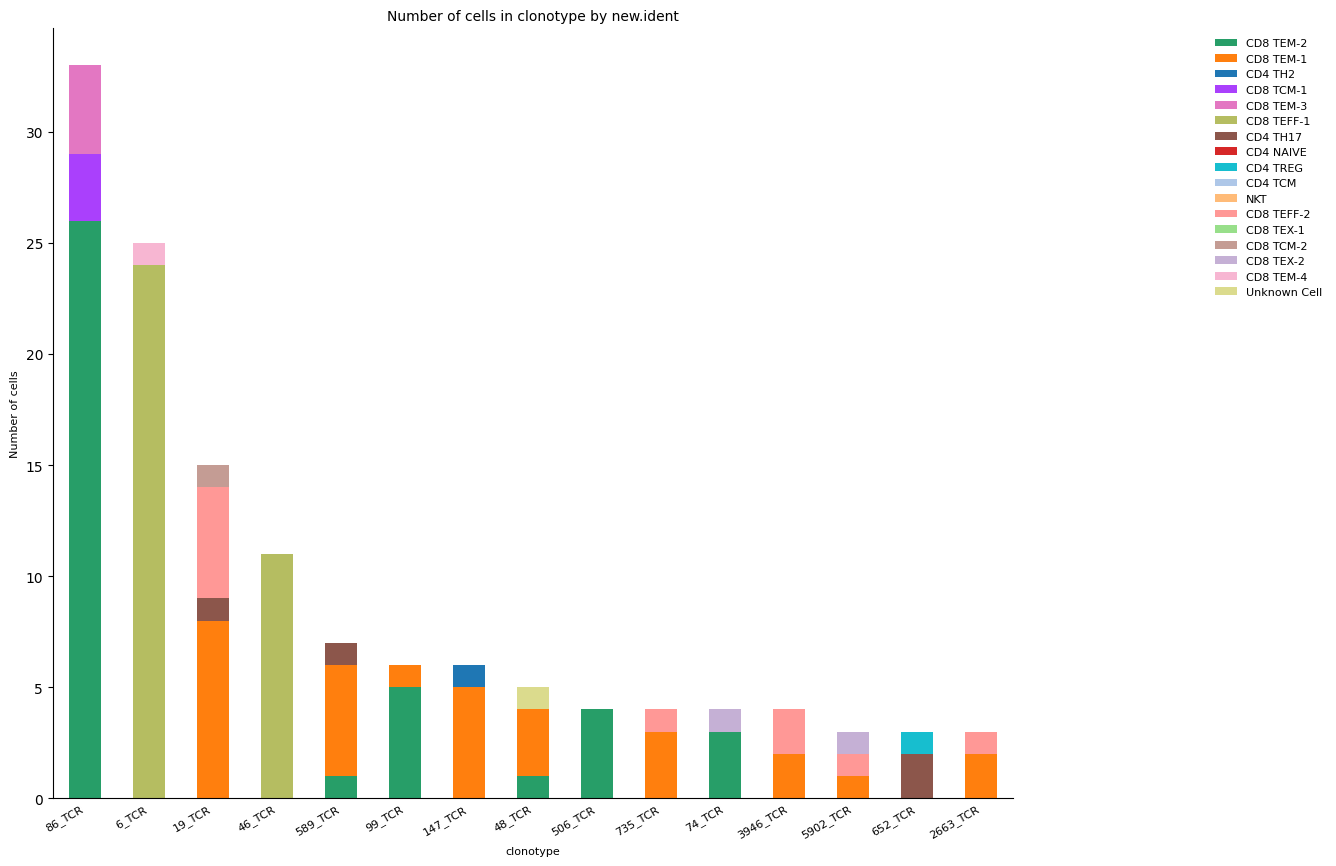

In [76]:
ir.pl.group_abundance(t5, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})

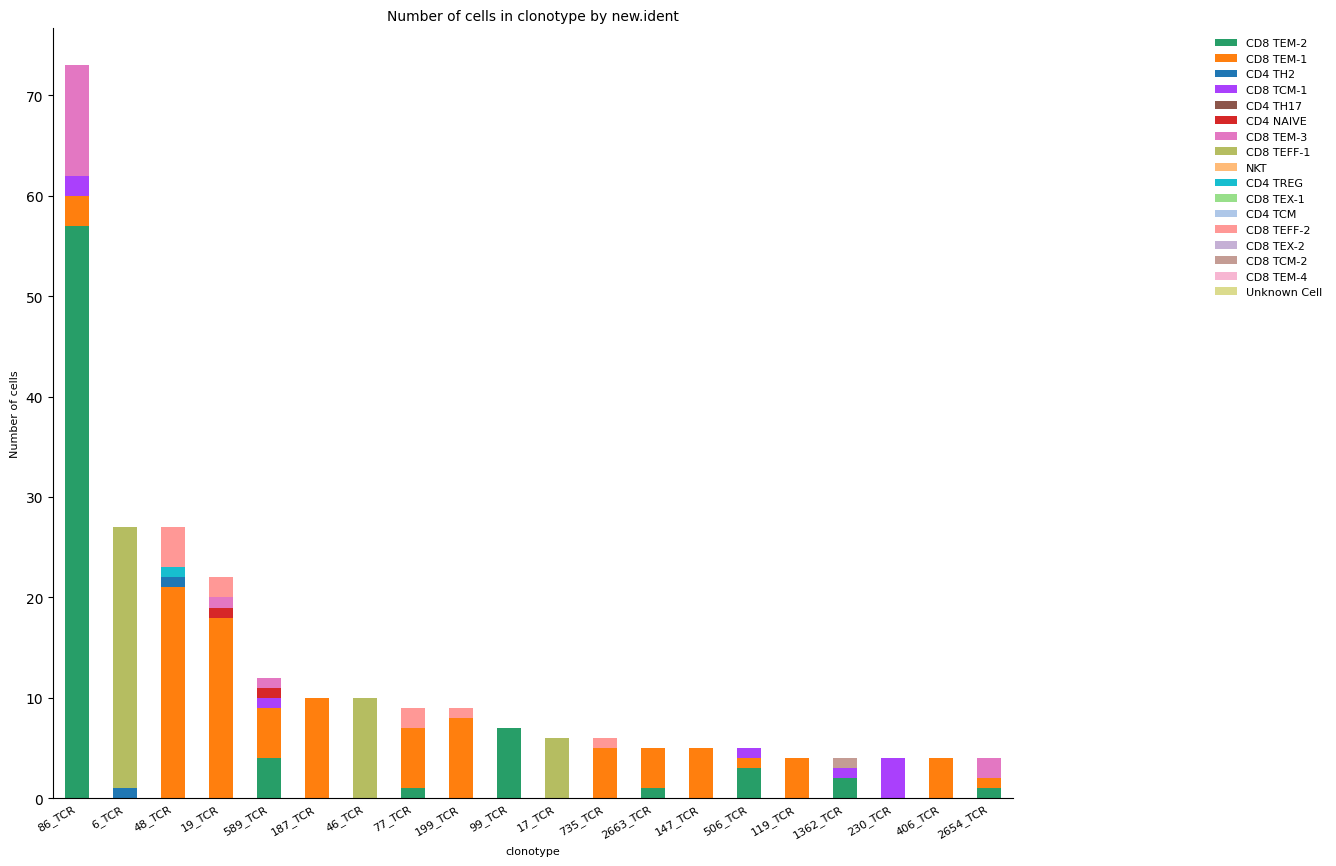

In [77]:
ir.pl.group_abundance(t6, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

In [114]:
cdex = adata[adata.obs['new.ident'].isin(['CD8 TEX-1','CD8 TEX-2'])]

/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×1060

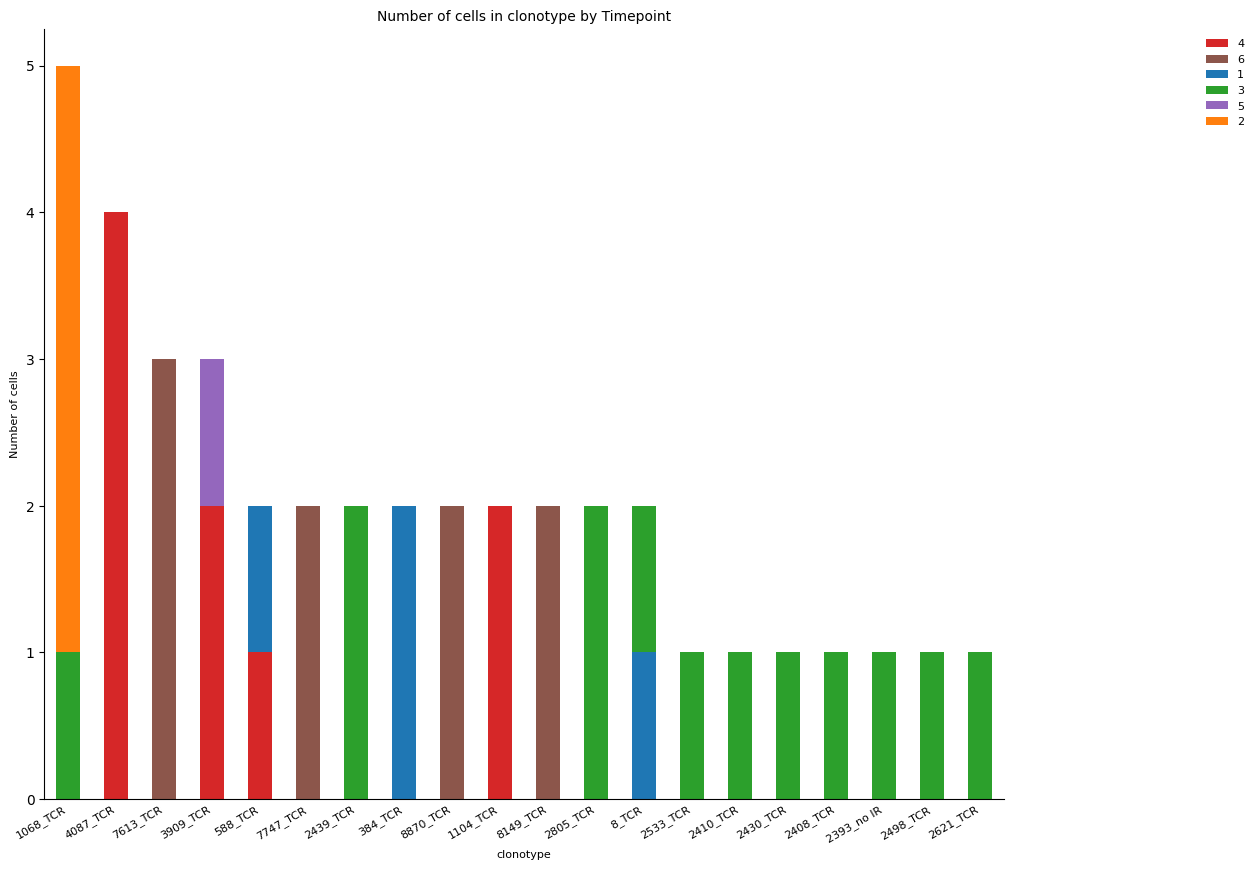

In [116]:
ir.pl.group_abundance(cdex, groupby="clonotype", target_col="Timepoint", max_cols=20,fig_kws={"dpi": 100})

In [49]:
cd8tem2 = adata[adata.obs['new.ident'].isin(['CD8 TEM-2'])]

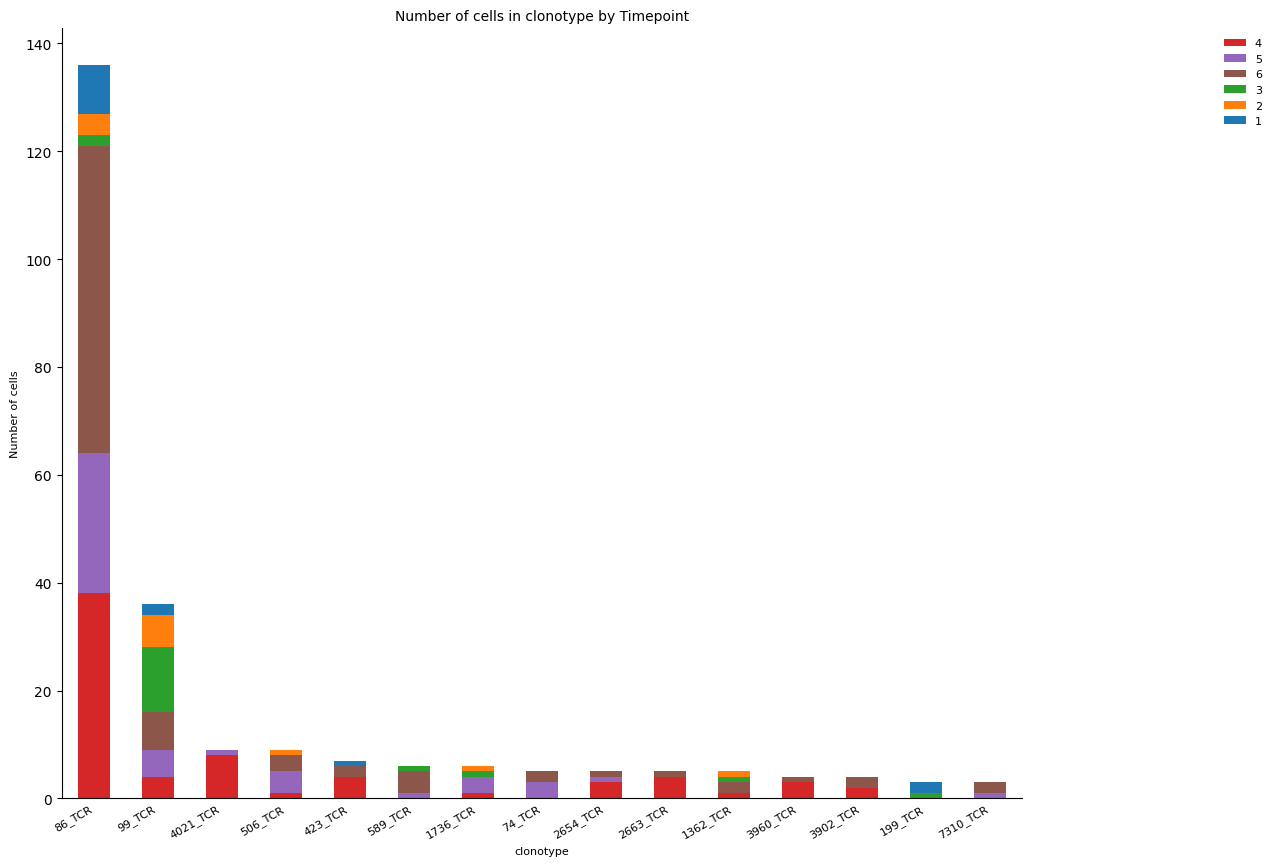

In [50]:
ir.pl.group_abundance(cd8tem2, groupby="clonotype", target_col="Timepoint", max_cols=15,fig_kws={"dpi": 100})

In [103]:
cd8teff1 = adata[adata.obs['new.ident'].isin(['CD8 TEFF-1'])]

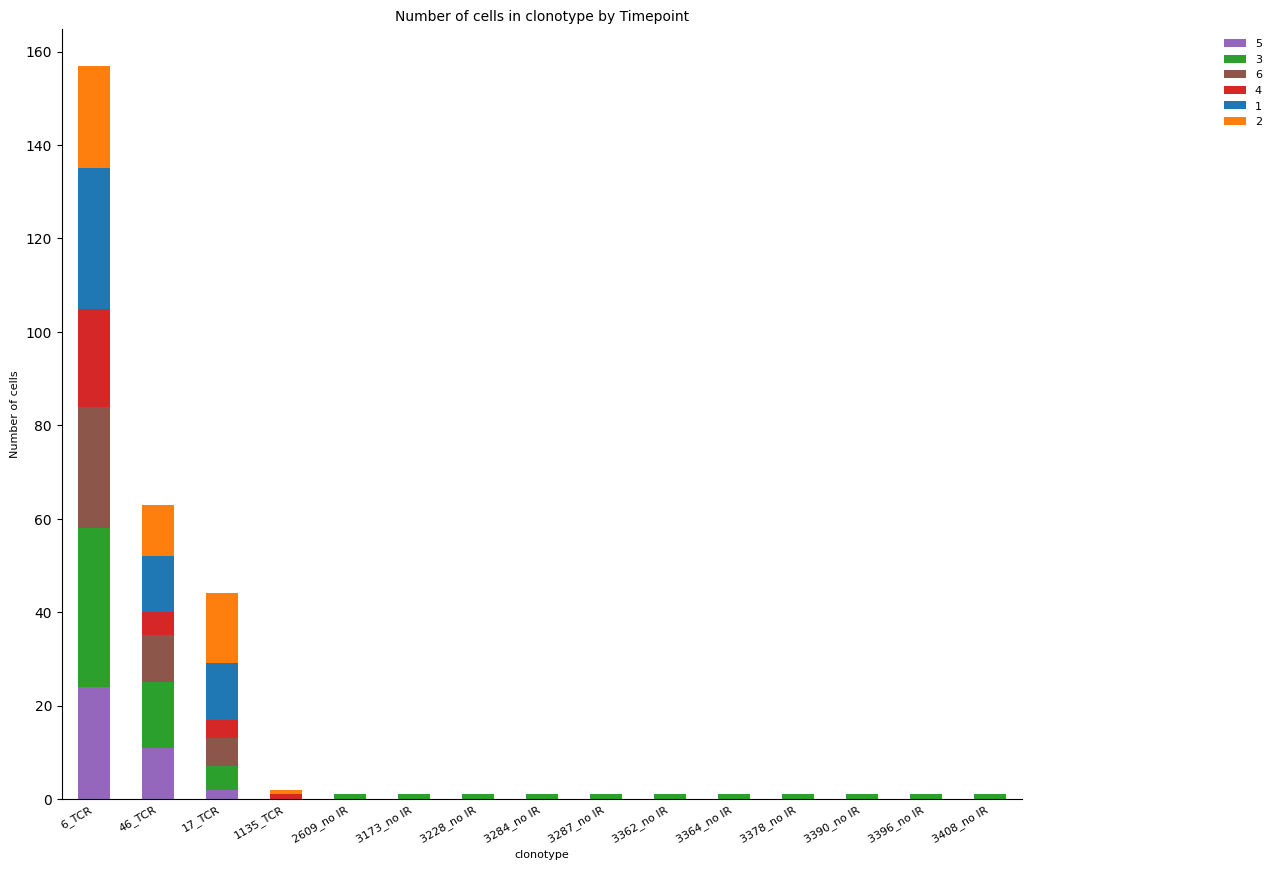

In [104]:
ir.pl.group_abundance(cd8teff1, groupby="clonotype", target_col="Timepoint", max_cols=15,fig_kws={"dpi": 100})

In [105]:
cd8teff1.obs['clonotype']
cd8teff1.obs[cd8teff1.obs['clonotype'].str.match('3173_no IR')]

nCount_RNA  nFeature_RNA  log10GenesPerUMI  \
Timepoint_3_GGTATTGGTGCACTTA-1      2722.0          1125          0.888283   

                                percent_mito  percent_ribo  percent_hb  \
Timepoint_3_GGTATTGGTGCACTTA-1      3.416605     25.826598         0.0   

                                 S.Score  G2M.Score Phase  nCount_SCT  \
Timepoint_3_GGTATTGGTGCACTTA-1 -0.005078  -0.030722    G1      3240.0   

                                nFeature_SCT integrated_snn_res.0.8  \
Timepoint_3_GGTATTGGTGCACTTA-1          1120                      8   

                               seurat_clusters   new.ident  \
Timepoint_3_GGTATTGGTGCACTTA-1               7  CD8 TEFF-1   

                               integrated_snn_res.1 Timepoint Disease_status  \
Timepoint_3_GGTATTGGTGCACTTA-1                    8         3      Remission   

                               Pembrolizumab iRAE cell_id IR_VJ_1_locus  \
Timepoint_3_GGTATTGGTGCACTTA-1           Yes   No     nan           NaN   

                               IR_VJ_2_locus IR_VDJ_1_locus IR_VDJ_2_locus  \
Timepoint_3_GGTATTGGTGCACTTA-1           nan            NaN            NaN   

                               IR_VJ_1_cdr3 IR_VJ_2_cdr3 IR_VDJ_1_cdr3  \
Timepoint_3_GGTATTGGTGCACTTA-1          nan          nan           nan   

                               IR_VDJ_2_cdr3 IR_VJ_1_cdr3_nt IR_VJ_2_cdr3_nt  \
Timepoint_3_GGTATTGGTGCACTTA-1           nan             nan             nan   

                               IR_VDJ_1_cdr3_nt IR_VDJ_2_cdr3_nt  \
Timepoint_3_GGTATTGGTGCACTTA-1              nan              nan   

                                IR_VJ_1_expr IR_VJ_2_expr  IR_VDJ_1_expr  \
Timepoint_3_GGTATTGGTGCACTTA-1           NaN          nan            NaN   

                                IR_VDJ_2_expr  IR_VJ_1_expr_raw  \
Timepoint_3_GGTATTGGTGCACTTA-1            NaN               NaN   

                               IR_VJ_2_expr_raw  IR_VDJ_1_expr_raw  \
Timepoint_3_GGTATTGGTGCACTTA-1              nan                NaN   

                                IR_VDJ_2_expr_raw IR_VJ_1_v_gene  \
Timepoint_3_GGTATTGGTGCACTTA-1                NaN            nan   

                               IR_VJ_2_v_gene IR_VDJ_1_v_gene IR_VDJ_2_v_gene  \
Timepoint_3_GGTATTGGTGCACTTA-1            nan             nan             nan   

                               IR_VJ_1_d_gene IR_VJ_2_d_gene IR_VDJ_1_d_gene  \
Timepoint_3_GGTATTGGTGCACTTA-1            NaN            NaN             NaN   

                               IR_VDJ_2_d_gene IR_VJ_1_j_gene IR_VJ_2_j_gene  \
Timepoint_3_GGTATTGGTGCACTTA-1             nan            nan            nan   

                               IR_VDJ_1_j_gene IR_VDJ_2_j_gene IR_VJ_1_c_gene  \
Timepoint_3_GGTATTGGTGCACTTA-1             NaN             nan            NaN   

                               IR_VJ_2_c_gene IR_VDJ_1_c_gene IR_VDJ_2_c_gene  \
Timepoint_3_GGTATTGGTGCACTTA-1            nan             NaN             nan   

                                IR_VJ_1_junction_ins IR_VJ_2_junction_ins  \
Timepoint_3_GGTATTGGTGCACTTA-1                   NaN                  nan   

                                IR_VDJ_1_junction_ins  IR_VDJ_2_junction_ins  \
Timepoint_3_GGTATTGGTGCACTTA-1                    NaN                    NaN   

                               has_ir multi_chain batch receptor_type  \
Timepoint_3_GGTATTGGTGCACTTA-1  False         nan     2         no IR   

                               receptor_subtype chain_pairing   clonotype  \
Timepoint_3_GGTATTGGTGCACTTA-1            no IR         no IR  3173_no IR   

                                clonotype_size ct_cluster_aa_alignment  \
Timepoint_3_GGTATTGGTGCACTTA-1               0                    2965   

                                ct_cluster_aa_alignment_size  \
Timepoint_3_GGTATTGGTGCACTTA-1                             1   

                               ct_cluster_aa_alignment_same_v  \
Timepoint_3_GGTATTGGTGCACTTA-1             2965_nan_nan_n

In [95]:
# del adata.uns['repertoire_overlap'] 

adata.write("tcr.h5ad")



In [97]:
adata

AnnData object with n_obs × n_vars = 10601 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1', 'Timepoint', 'Disease_status', 'Pembrolizumab', 'iRAE', 'cell_id', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_

In [106]:
cd4 = adata[adata.obs['new.ident'].isin(['CD4 Naive','CD4 TH17','CD4 TH2','CD4 TREG'])]

/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×1060

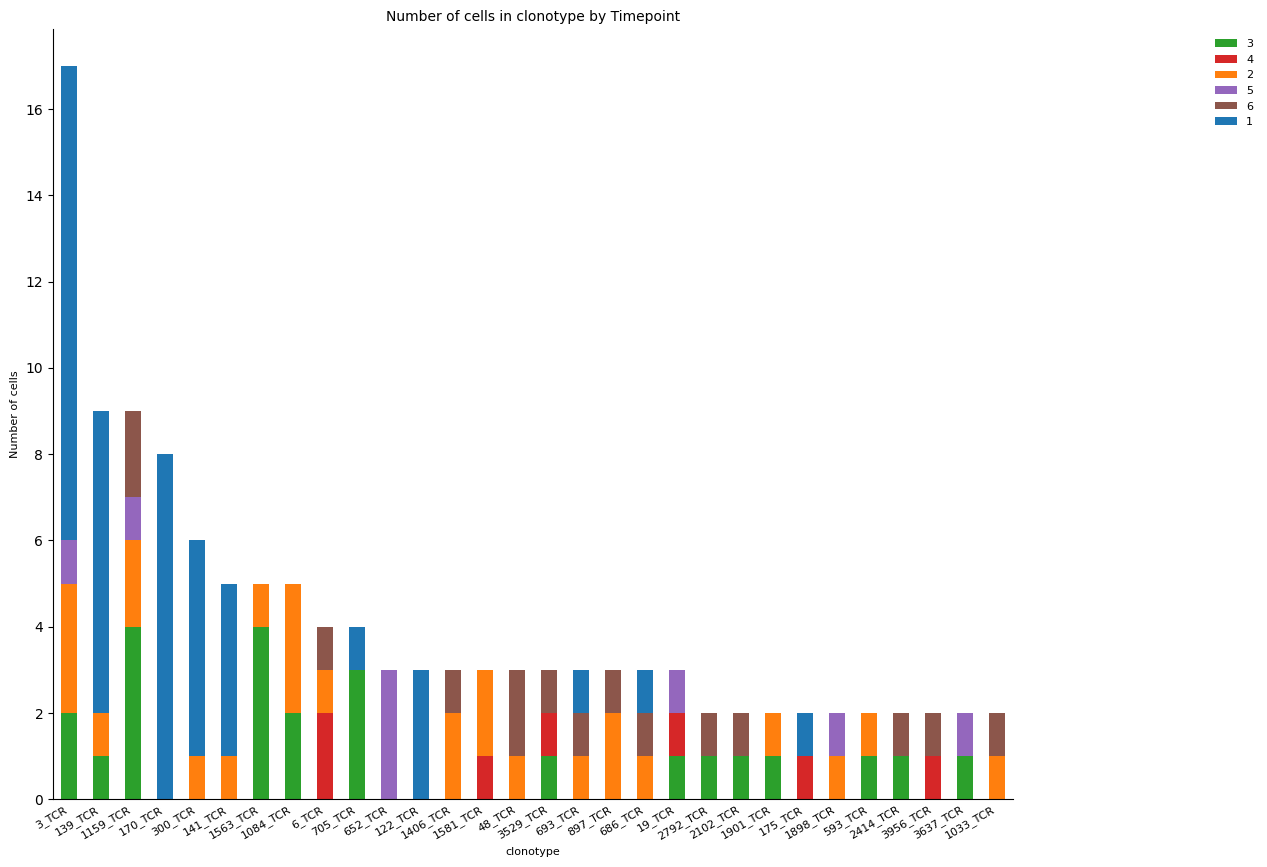

In [112]:
ir.pl.group_abundance(cd4, groupby="clonotype", target_col="Timepoint", max_cols=30,fig_kws={"dpi": 100})

In [34]:
adata = sc.read('/home/matthew/Research/HL_PD1/tcell_subsets/tcr.h5ad')
# adata.obs

# obs=pd.read_csv('/home/matthew/Research/HL_PD1/tcell_subsets/tcr_analyzed(1).csv')
# adata.obs = obs
# adata.obs


In [20]:
# adata.obs.dtypes
# adata.obs['clonal_expansion'] = adata.obs.clonal_expansion.astype('category')
# adata.obs.dtypes
adata.obs

Unnamed: 0  nCount_RNA  nFeature_RNA  \
0      Timepoint_1_AAACCTGAGAGAGCTC-1        3008          1184   
1      Timepoint_1_AAACCTGGTGTTTGGT-1        2711          1256   
2      Timepoint_1_AAACGGGTCTTGCCGT-1        1862           814   
3      Timepoint_1_AAAGATGAGTCCAGGA-1        4551          1369   
4      Timepoint_1_AAAGCAAAGGTGTGGT-1        2603          1056   
...                               ...         ...           ...   
10596  Timepoint_6_TTTGCGCTCATCTGTT-1        6837          2082   
10597  Timepoint_6_TTTGGTTCAAGTACCT-1        5310          1623   
10598  Timepoint_6_TTTGTCACAAGTTGTC-1        3303          1205   
10599  Timepoint_6_TTTGTCACAATTGCTG-1        2509          1180   
10600  Timepoint_6_TTTGTCACACATGGGA-1        4062          1449   

       log10GenesPerUMI  percent_mito  percent_ribo  percent_hb   S.Score  \
0              0.883584      6.781915     29.953457         0.0  0.034645   
1              0.902730      4.387906     24.151917         0.0  0.021716   
2              0.890105      5.209452     30.612245         0.0 -0.021759   
3              0.857384      5.251593     39.485827         0.0  0.047148   
4              0.885284      5.186323     26.584710         0.0 -0.045752   
...                 ...           ...           ...         ...       ...   
10596          0.865425      8.363796     25.851733         0.0 -0.024576   
10597          0.861809      1.713748     38.681733         0.0  0.090187   
10598          0.875552      1.877081     36.845292         0.0  0.054811   
10599          0.903627      7.532882     18.573137         0.0 -0.009382   
10600          0.875948      2.461841     32.939439         0.0  0.069706   

       G2M.Score Phase  nCount_SCT  nFeature_SCT  integrated_snn_res.0.8  \
0       0.068198   G2M        3409          1181                       2   
1       0.025207   G2M        3287          1253                       5   
2      -0.014021    G1        3266           838                       1   
3      -0.018358     S        3996          1366                       2   
4       0.065598   G2M        3311          1057                       3   
...          ...   ...         ...           ...                     ...   
10596   0.046420   G2M        4022          1860                       1   
10597   0.007137     S        3799          1592                      10   
10598  -0.038137     S        3288          1201                       2   
10599  -0.069536    G1        2889          1179                       2   
10600   0.036985     S        3585          1445                       7   

       seurat_clusters   new.ident  integrated_snn_res.1  Timepoint  \
0                    3     CD4 TH2                     1          1   
1                    4   CD8 TCM-1                     5          1   
2                    1   CD8 TEM-1                     2          1   
3                    3     CD4 TH2                     1          1   
4                    2   CD8 TEM-2                     3          1   
...                ...         ...                   ...        ...   
10596               11  CD8 TEFF-2                    13          6   
10597               10     CD4 TCM                    10          6   
10598                3     CD4 TH2                     1          6   
10599                3     CD4 TH2                     1          6   
10600                6    CD4 TH17                     6          6   

      Disease_status Pembrolizumab iRAE                         cell_id  \
0                 HL            No   No  Timepoint_1_AAACCTGAGAGAGCTC-1   
1                 HL            No   No  Timepoint_1_AAACCTGGTGTTTGGT-1   
2                 HL            No   No  Timepoint_1_AAACGGGTCTTGCCGT-1   
3                 HL            No   No  Timepoint_1_AAAGATGAGTCCAGGA-1   
4                 HL            No   No  Timepoint_1_AAAGCAAAGGTGTGGT-1   
...              ...           ...  ...                             ...   
10596 

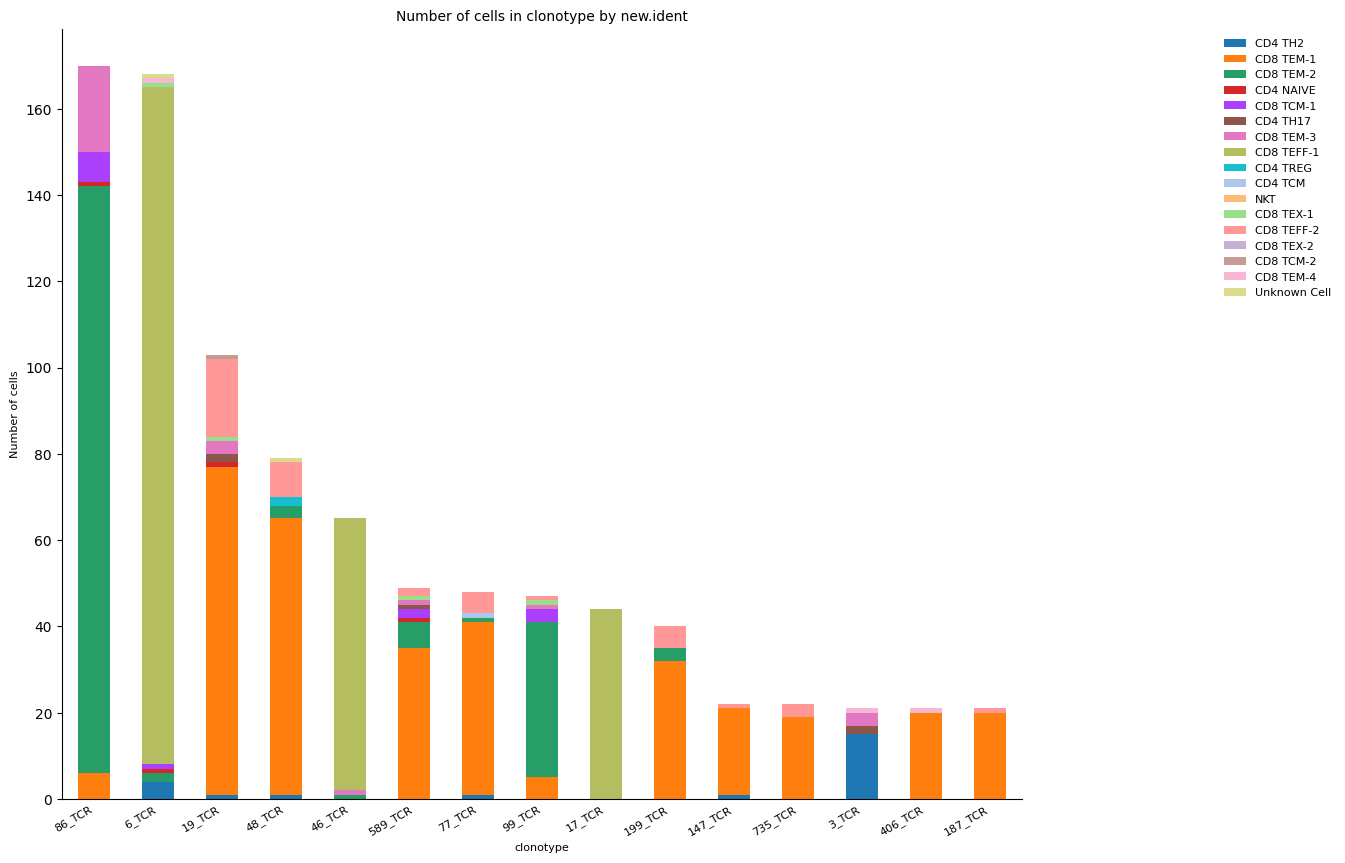

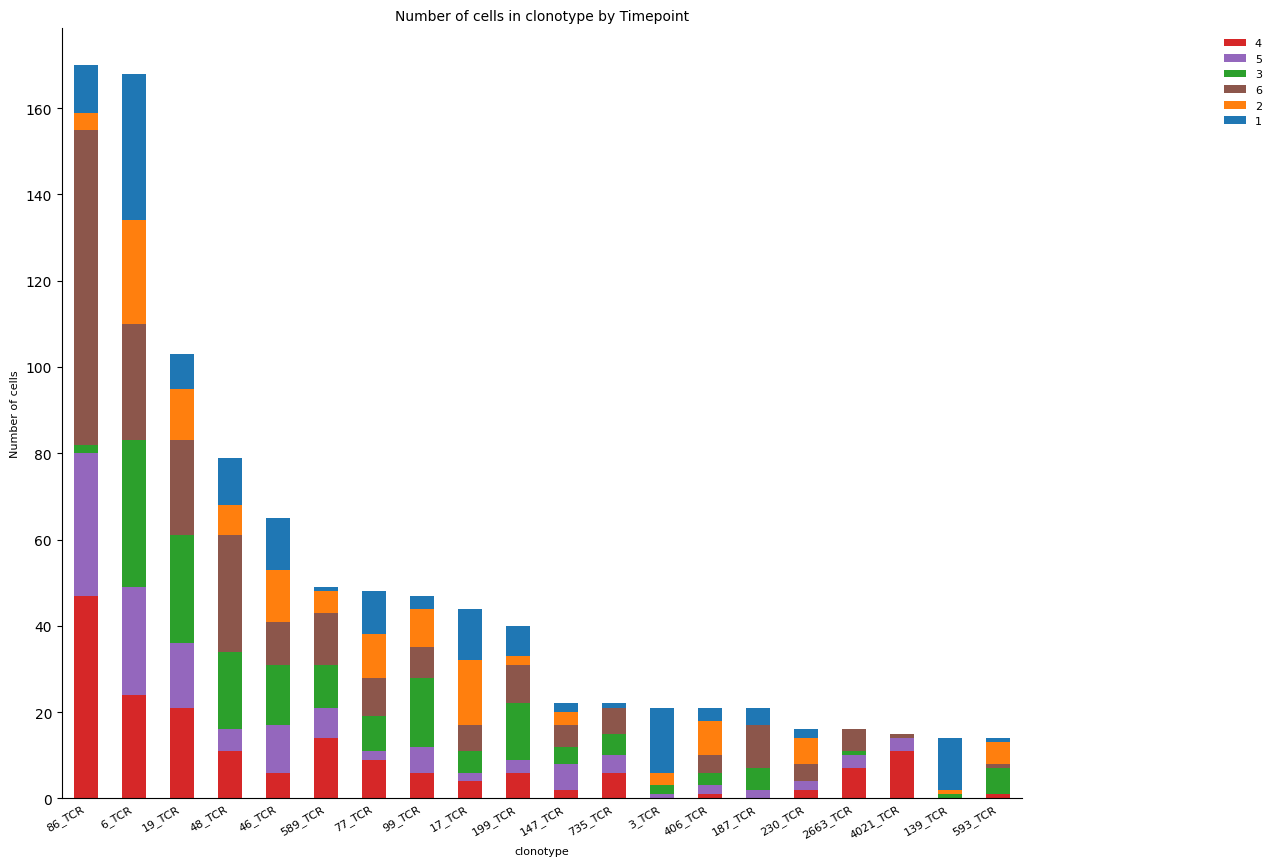

In [7]:
ir.pl.group_abundance(adata, groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 100})
ir.pl.group_abundance(
    adata, groupby="clonotype", target_col="Timepoint", max_cols=20 ,fig_kws={"dpi": 100}
)

In [35]:
# plot for each timepoint
t1 = adata[adata.obs['Timepoint'].isin(['1'])]
t2 = adata[adata.obs['Timepoint'].isin(['2'])]
t3 = adata[adata.obs['Timepoint'].isin(['3'])]
t4 = adata[adata.obs['Timepoint'].isin(['4'])]
t5 = adata[adata.obs['Timepoint'].isin(['5'])]
t6 = adata[adata.obs['Timepoint'].isin(['6'])]


/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['distances'] that happens to be dimensioned at n_obs×n_obs (10601×10601).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/matthew/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:194: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (10601×106

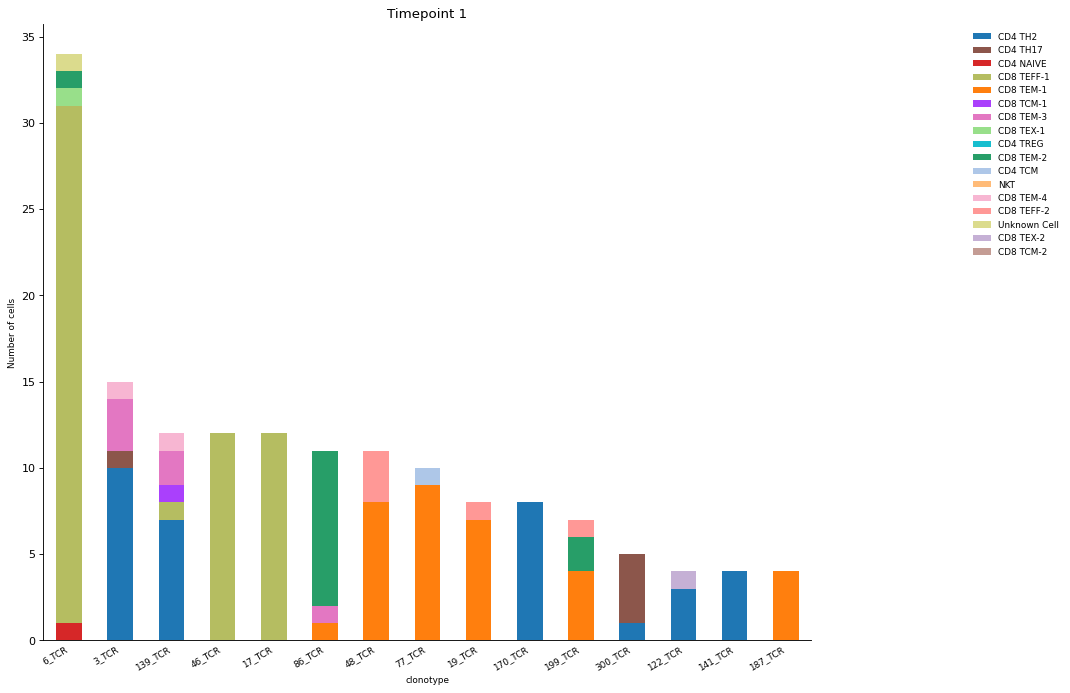

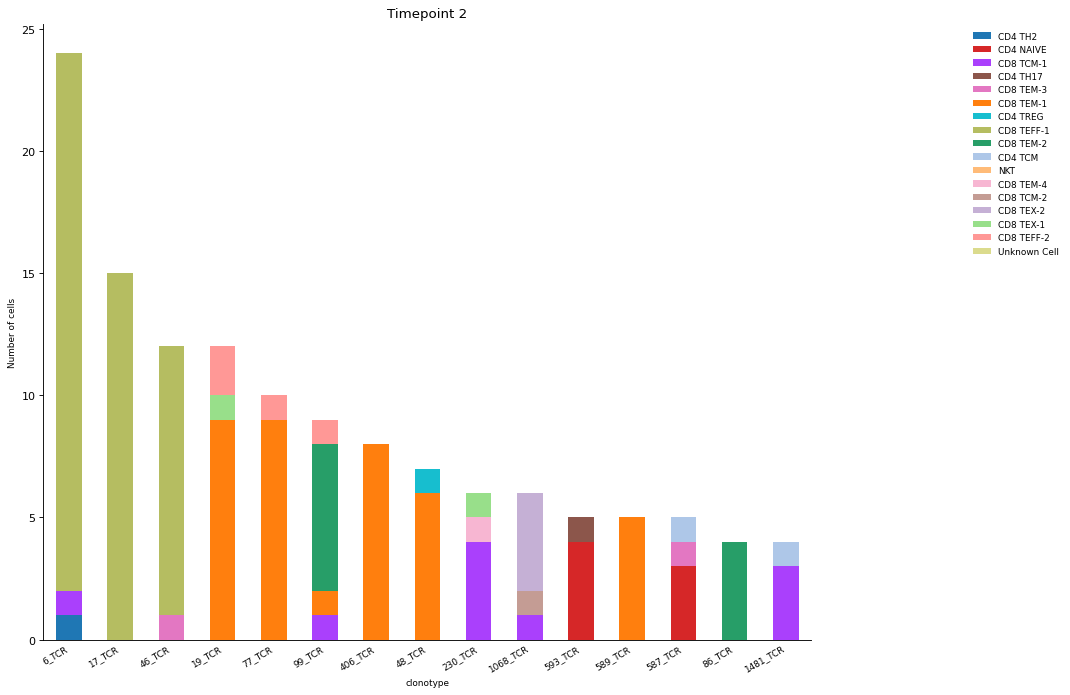

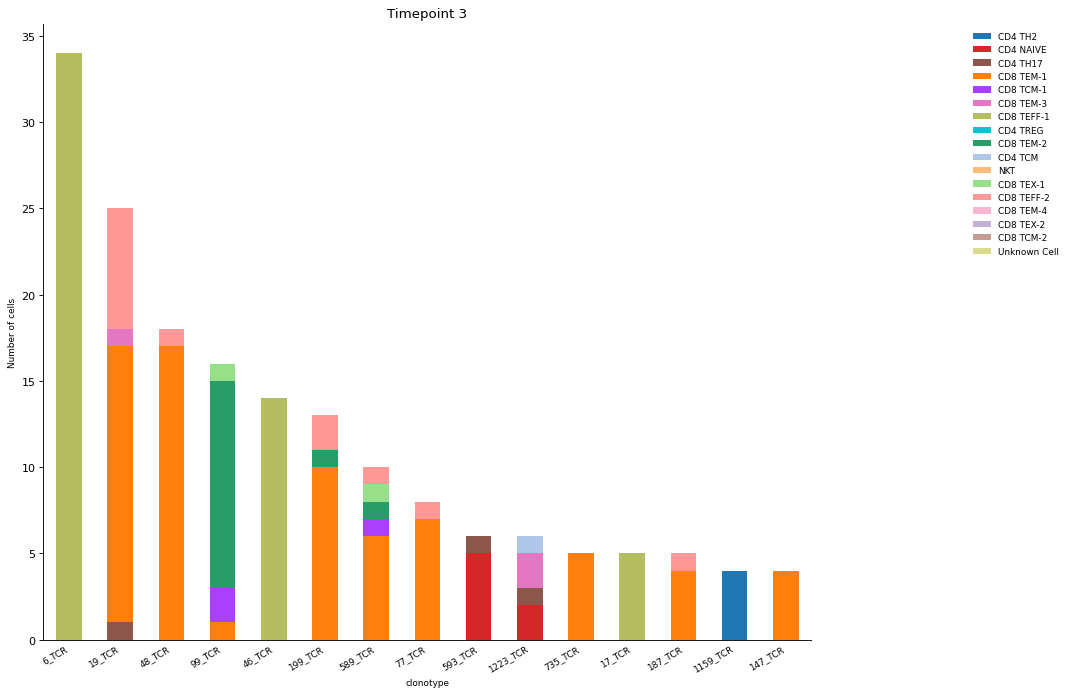

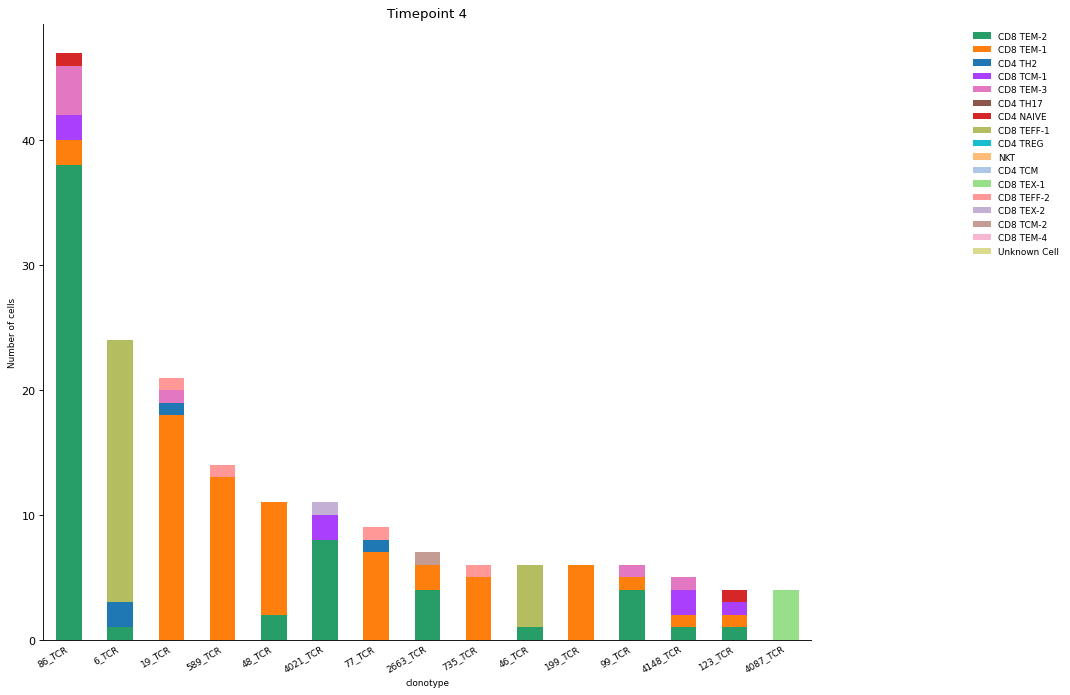

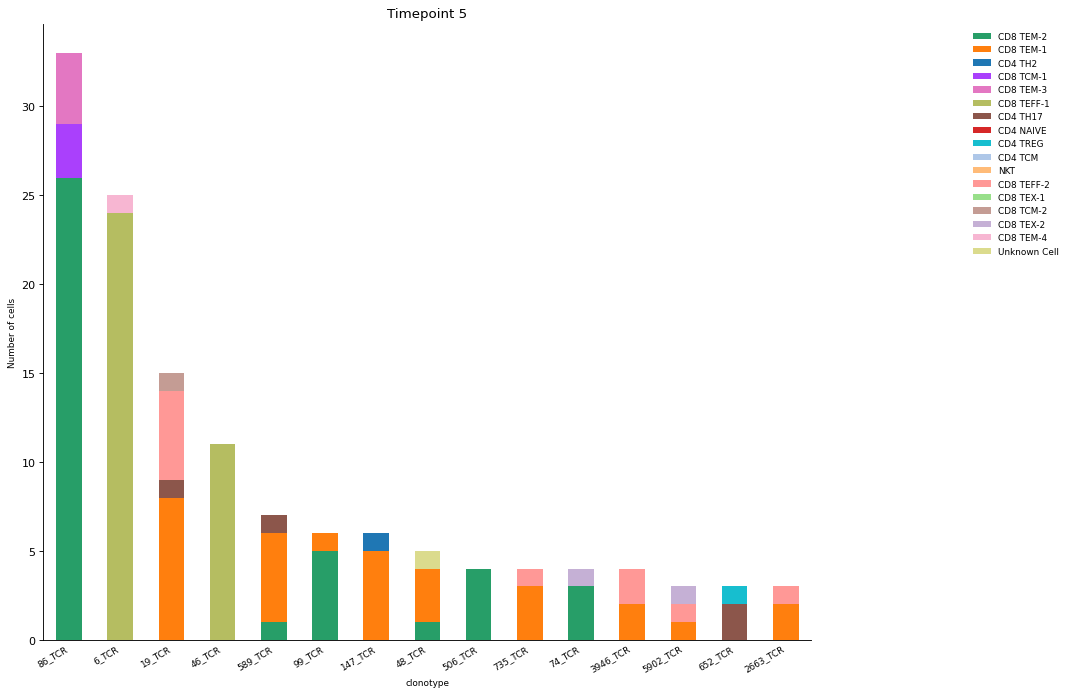

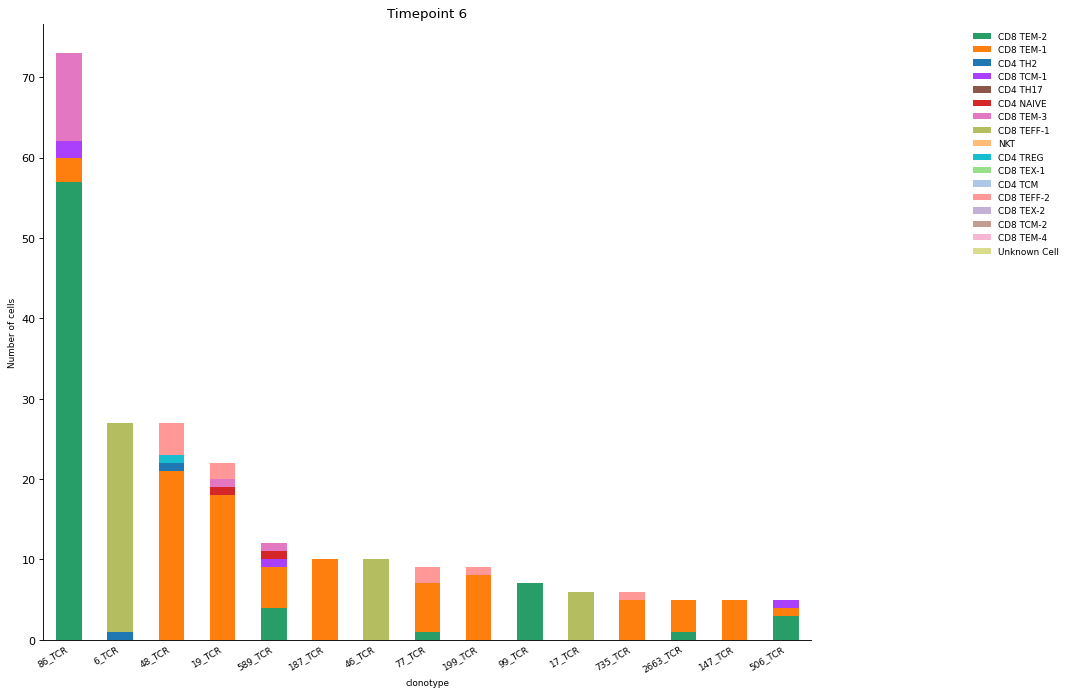

In [49]:
timepoints = [t1,t2,t3,t4,t5,t6]
title= ["Timepoint 1","Timepoint 2","Timepoint 3","Timepoint 4","Timepoint 5","Timepoint 6"]


for x in range(6):

    p=ir.pl.group_abundance(timepoints[x], groupby="clonotype", target_col="new.ident", max_cols=15,fig_kws={"dpi": 80})
    p.set_title(title[x])
    p.figure.savefig('/home/matthew/Research/HL_PD1/tcell_subsets/plots/'+title[x]+'.png',bbox_inches='tight') 

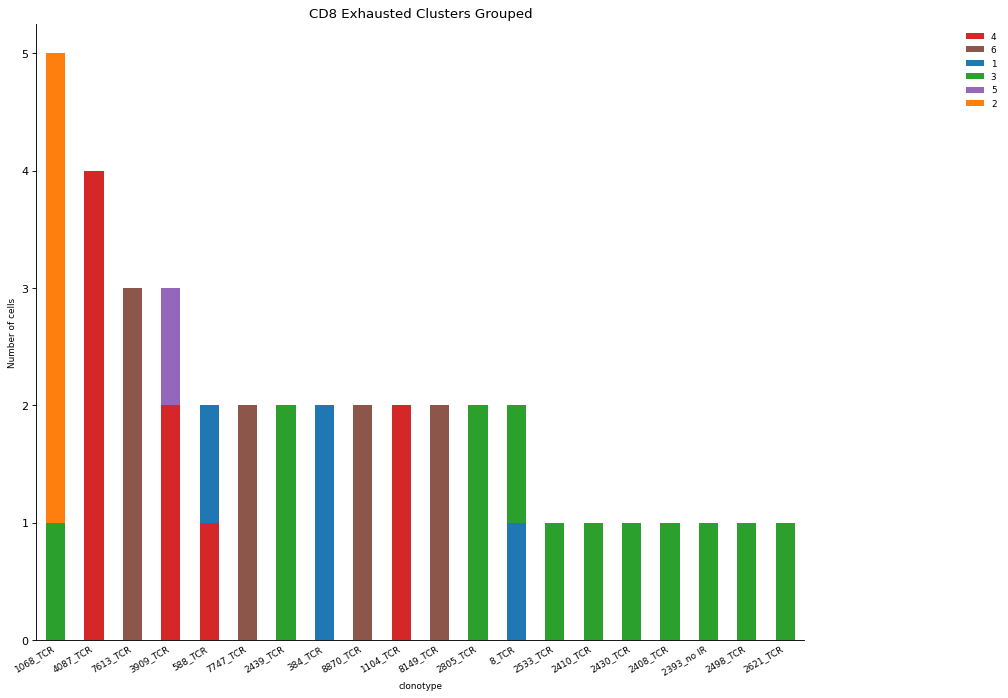

In [53]:
cdex = adata[adata.obs['new.ident'].isin(['CD8 TEX-1','CD8 TEX-2'])]

p=ir.pl.group_abundance(cdex, groupby="clonotype", target_col="Timepoint", max_cols=20,fig_kws={"dpi": 80})
p.set_title("CD8 Exhausted Clusters Grouped")
p.figure.savefig('/home/matthew/Research/HL_PD1/tcell_subsets/plots/exhausted.png',bbox_inches='tight') 

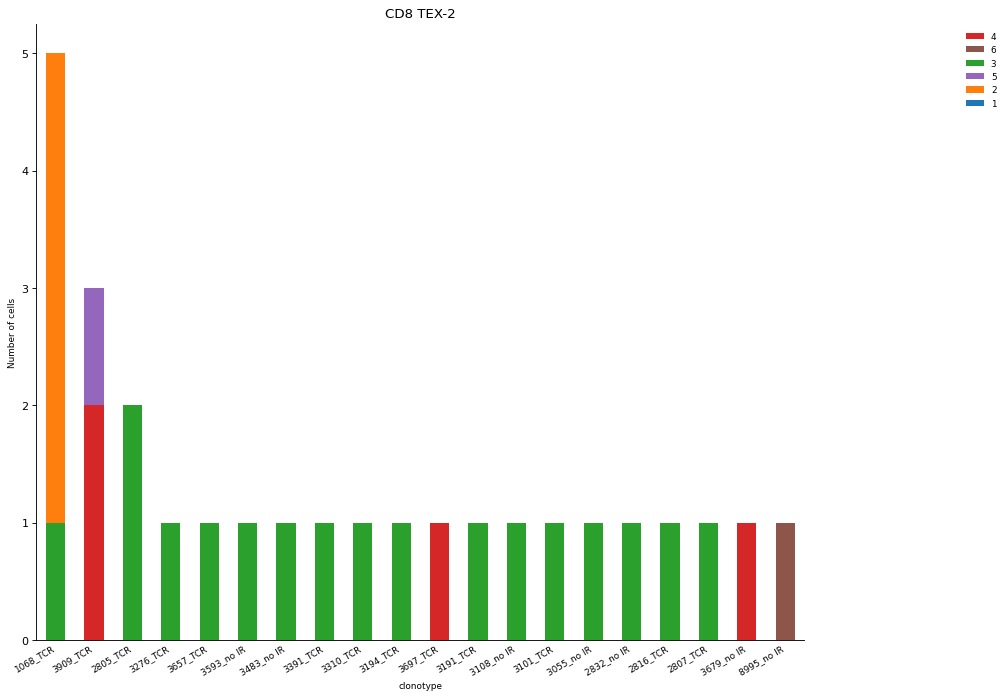

In [55]:
cdex = adata[adata.obs['new.ident'].isin(['CD8 TEX-2'])]

p=ir.pl.group_abundance(cdex, groupby="clonotype", target_col="Timepoint", max_cols=20,fig_kws={"dpi": 80})
p.set_title("CD8 TEX-2")
p.figure.savefig('/home/matthew/Research/HL_PD1/tcell_subsets/plots/exhausted-tex2.png',bbox_inches='tight') 

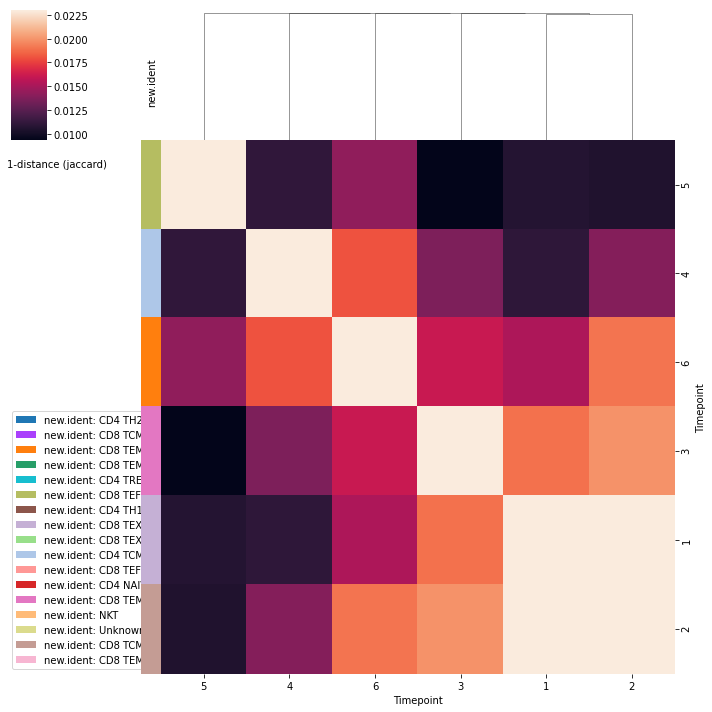

In [20]:
# ir.tl.repertoire_overlap(adata, "Timepoint")
ir.pl.repertoire_overlap(adata, "Timepoint", heatmap_cats=["new.ident"],fig_kws={"dpi": 80})

In [32]:
# ir.pl.clonal_expansion(adata, groupby="Timepoint", clip_at=4, normalize=False,fig_kws={"dpi": 80})
adata.obs

Unnamed: 0  nCount_RNA  nFeature_RNA  \
0      Timepoint_1_AAACCTGAGAGAGCTC-1        3008          1184   
1      Timepoint_1_AAACCTGGTGTTTGGT-1        2711          1256   
2      Timepoint_1_AAACGGGTCTTGCCGT-1        1862           814   
3      Timepoint_1_AAAGATGAGTCCAGGA-1        4551          1369   
4      Timepoint_1_AAAGCAAAGGTGTGGT-1        2603          1056   
...                               ...         ...           ...   
10596  Timepoint_6_TTTGCGCTCATCTGTT-1        6837          2082   
10597  Timepoint_6_TTTGGTTCAAGTACCT-1        5310          1623   
10598  Timepoint_6_TTTGTCACAAGTTGTC-1        3303          1205   
10599  Timepoint_6_TTTGTCACAATTGCTG-1        2509          1180   
10600  Timepoint_6_TTTGTCACACATGGGA-1        4062          1449   

       log10GenesPerUMI  percent_mito  percent_ribo  percent_hb   S.Score  \
0              0.883584      6.781915     29.953457         0.0  0.034645   
1              0.902730      4.387906     24.151917         0.0  0.021716   
2              0.890105      5.209452     30.612245         0.0 -0.021759   
3              0.857384      5.251593     39.485827         0.0  0.047148   
4              0.885284      5.186323     26.584710         0.0 -0.045752   
...                 ...           ...           ...         ...       ...   
10596          0.865425      8.363796     25.851733         0.0 -0.024576   
10597          0.861809      1.713748     38.681733         0.0  0.090187   
10598          0.875552      1.877081     36.845292         0.0  0.054811   
10599          0.903627      7.532882     18.573137         0.0 -0.009382   
10600          0.875948      2.461841     32.939439         0.0  0.069706   

       G2M.Score Phase  nCount_SCT  nFeature_SCT  integrated_snn_res.0.8  \
0       0.068198   G2M        3409          1181                       2   
1       0.025207   G2M        3287          1253                       5   
2      -0.014021    G1        3266           838                       1   
3      -0.018358     S        3996          1366                       2   
4       0.065598   G2M        3311          1057                       3   
...          ...   ...         ...           ...                     ...   
10596   0.046420   G2M        4022          1860                       1   
10597   0.007137     S        3799          1592                      10   
10598  -0.038137     S        3288          1201                       2   
10599  -0.069536    G1        2889          1179                       2   
10600   0.036985     S        3585          1445                       7   

       seurat_clusters   new.ident  integrated_snn_res.1  Timepoint  \
0                    3     CD4 TH2                     1          1   
1                    4   CD8 TCM-1                     5          1   
2                    1   CD8 TEM-1                     2          1   
3                    3     CD4 TH2                     1          1   
4                    2   CD8 TEM-2                     3          1   
...                ...         ...                   ...        ...   
10596               11  CD8 TEFF-2                    13          6   
10597               10     CD4 TCM                    10          6   
10598                3     CD4 TH2                     1          6   
10599                3     CD4 TH2                     1          6   
10600                6    CD4 TH17                     6          6   

      Disease_status Pembrolizumab iRAE                         cell_id  \
0                 HL            No   No  Timepoint_1_AAACCTGAGAGAGCTC-1   
1                 HL            No   No  Timepoint_1_AAACCTGGTGTTTGGT-1   
2                 HL            No   No  Timepoint_1_AAACGGGTCTTGCCGT-1   
3                 HL            No   No  Timepoint_1_AAAGATGAGTCCAGGA-1   
4                 HL            No   No  Timepoint_1_AAAGCAAAGGTGTGGT-1   
...              ...           ...  ...                             ...   
10596 

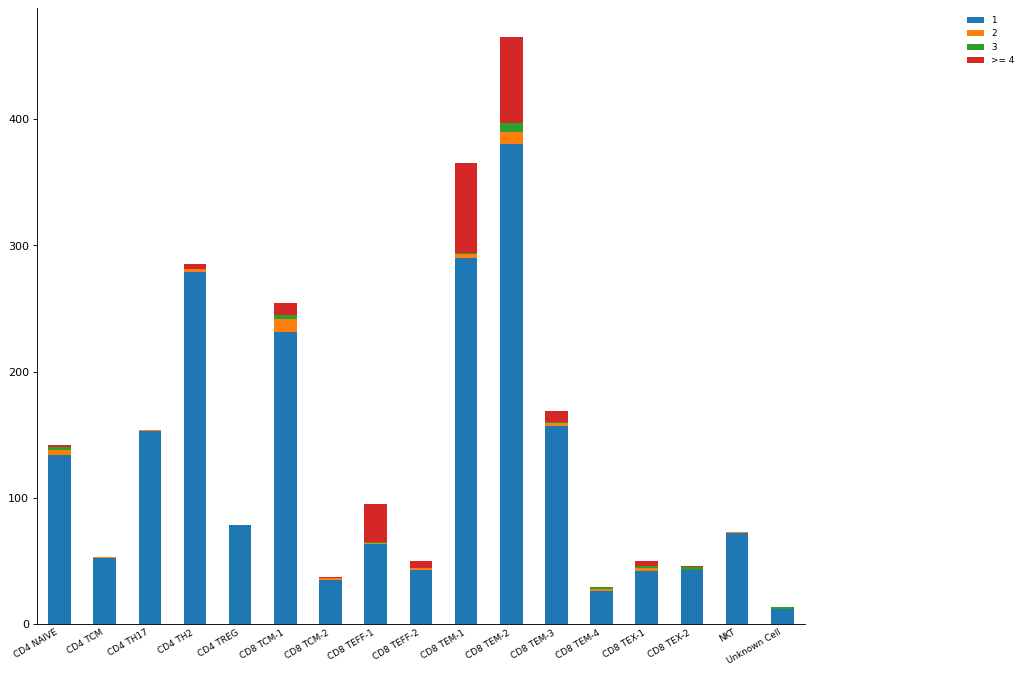

In [13]:
ir.pl.clonal_expansion(t4, groupby="new.ident", clip_at=4, normalize=False,fig_kws={"dpi": 80})

In [37]:
cd8tem1 = adata[adata.obs['new.ident'].isin(['CD8 TEM-1','CD8 TEFF-1'])]

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


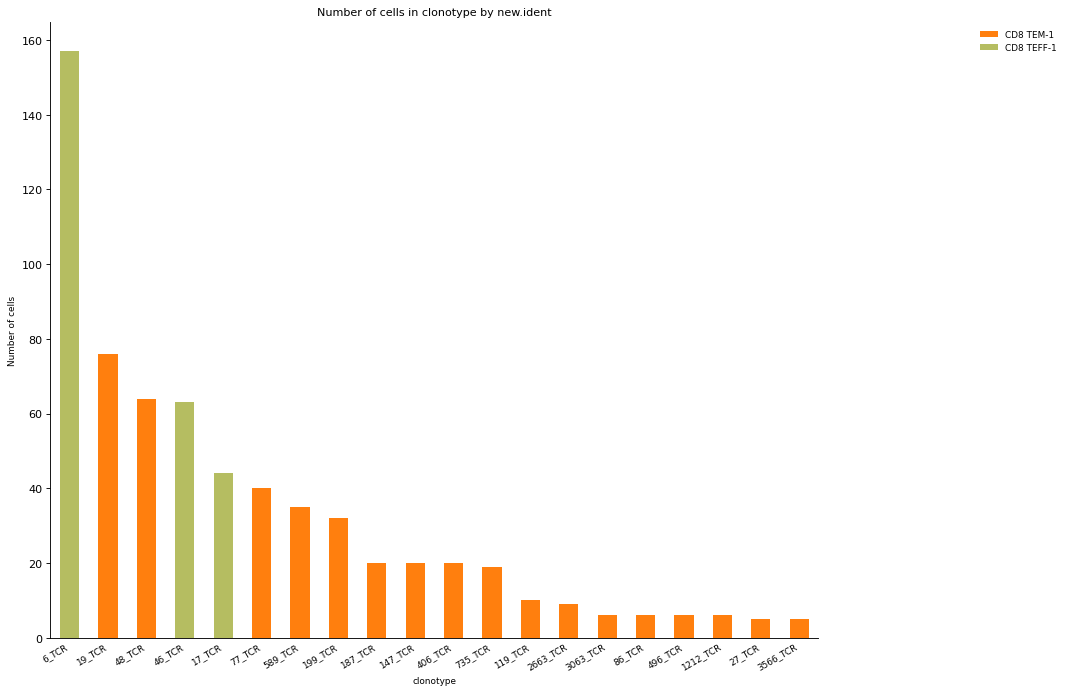

In [80]:
ir.pl.group_abundance(cd8tem1, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 80})

In [84]:
cd8tex = adata[adata.obs['new.ident'].isin(['CD8 TEX-1','CD8 TEX-2'])]
cd8tex.obs

Unnamed: 0  nCount_RNA  nFeature_RNA  \
8      Timepoint_1_AAATGCCCAGCATGAG-1        2359          1075   
9      Timepoint_1_AACACGTAGCCCGAAA-1        6935          2077   
42     Timepoint_1_AATCGGTCAACACCTA-1        6006          1977   
85     Timepoint_1_ACGGAGAGTAGTACCT-1        4923          1760   
90     Timepoint_1_ACTATCTAGACACGAC-1        3972          1416   
...                               ...         ...           ...   
10543  Timepoint_6_TTCTACACAGTCTTCC-1        3342          1251   
10572  Timepoint_6_TTGGAACCATGGTAGG-1        3718          1431   
10573  Timepoint_6_TTGGCAAAGCTAACTC-1        3290          1304   
10587  Timepoint_6_TTTATGCTCTAGCACA-1       18387          3946   
10591  Timepoint_6_TTTCCTCGTACCATCA-1       12868          3231   

       log10GenesPerUMI  percent_mito  percent_ribo  percent_hb   S.Score  \
8              0.898871      8.686441     24.110169    0.042373  0.037996   
9              0.863680      4.397981     21.009373    0.014420 -0.056942   
42             0.872286      3.463203     27.056277    0.000000 -0.000471   
85             0.879012      6.418850     21.511274    0.000000  0.099026   
90             0.875536      4.154079     29.733132    0.000000 -0.021412   
...                 ...           ...           ...         ...       ...   
10543          0.878968      3.709243     32.904577    0.000000 -0.048214   
10572          0.883856      1.802044     26.681011    0.000000 -0.024178   
10573          0.885789      7.474932     27.073838    0.030386 -0.036464   
10587          0.843360      6.253059     19.302920    0.010875  0.601714   
10591          0.854032      5.663896     15.678657    0.007769  0.088492   

       G2M.Score Phase  nCount_SCT  nFeature_SCT  integrated_snn_res.0.8  \
8       0.041629   G2M        3223          1077                      11   
9       0.015025   G2M        4367          1997                      11   
42     -0.000870    G1        4267          1950                      11   
85      0.037956     S        4152          1752                      11   
90      0.068700   G2M        3828          1411                      11   
...          ...   ...         ...           ...                     ...   
10543  -0.039292    G1        3306          1246                      11   
10572  -0.041115    G1        3464          1428                      11   
10573  -0.038369    G1        3281          1299                      11   
10587   0.533746     S        3989          1643                      11   
10591   0.274671   G2M        3629          1418                      11   

       seurat_clusters  new.ident  integrated_snn_res.1  Timepoint  \
8                   17  CD8 TEX-2                    14          1   
9                   15  CD8 TEX-1                    12          1   
42                  15  CD8 TEX-1                    12          1   
85                  15  CD8 TEX-1                    12          1   
90                  15  CD8 TEX-1                    12          1   
...                ...        ...                   ...        ...   
10543               17  CD8 TEX-2                    14          6   
10572               17  CD8 TEX-2                    14          6   
10573               17  CD8 TEX-2                    14          6   
10587               15  CD8 TEX-1                    12          6   
10591               15  CD8 TEX-1                    12          6   

      Disease_status Pembrolizumab iRAE                         cell_id  \
8                 HL            No   No  Timepoint_1_AAATGCCCAGCATGAG-1   
9                 HL            No   No  Timepoint_1_AACACGTAGCCCGAAA-1   
42                HL            No   No  Timepoint_1_AATCGGTCAACACCTA-1   
85                HL            No   No  Timepoint_1_ACGGAGAGTAGTACCT-1   
90                HL            No   No  Timepoint_1_ACTATCTAGACACGAC-1   
...              ...           ...  ...                             ...   
10543        Relap

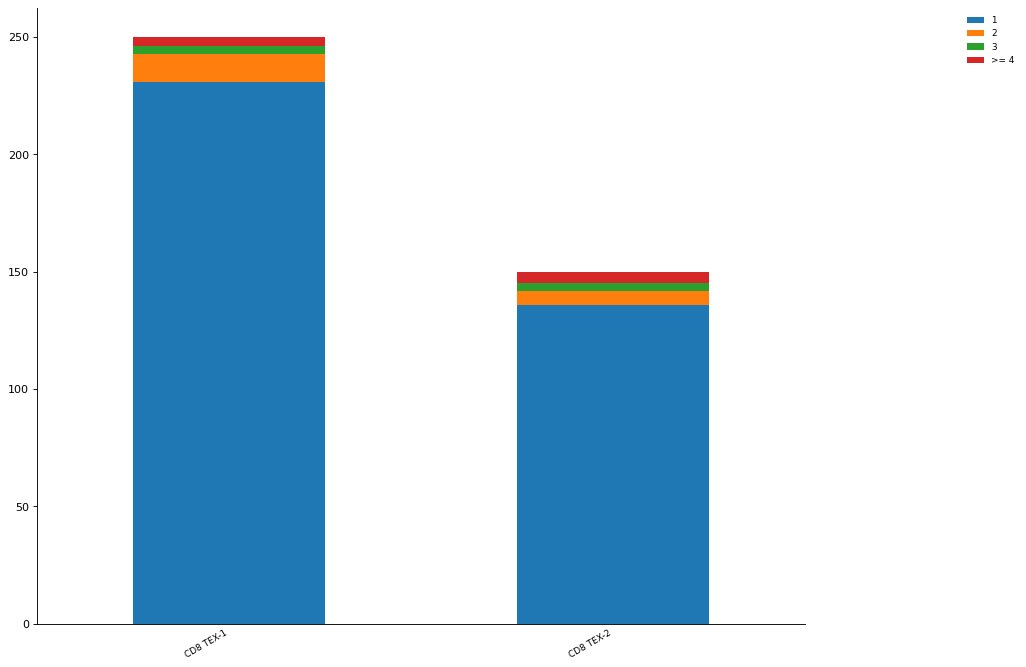

In [83]:
ir.pl.clonal_expansion(cd8tex, groupby="new.ident", clip_at=4, normalize=False,fig_kws={"dpi": 80})

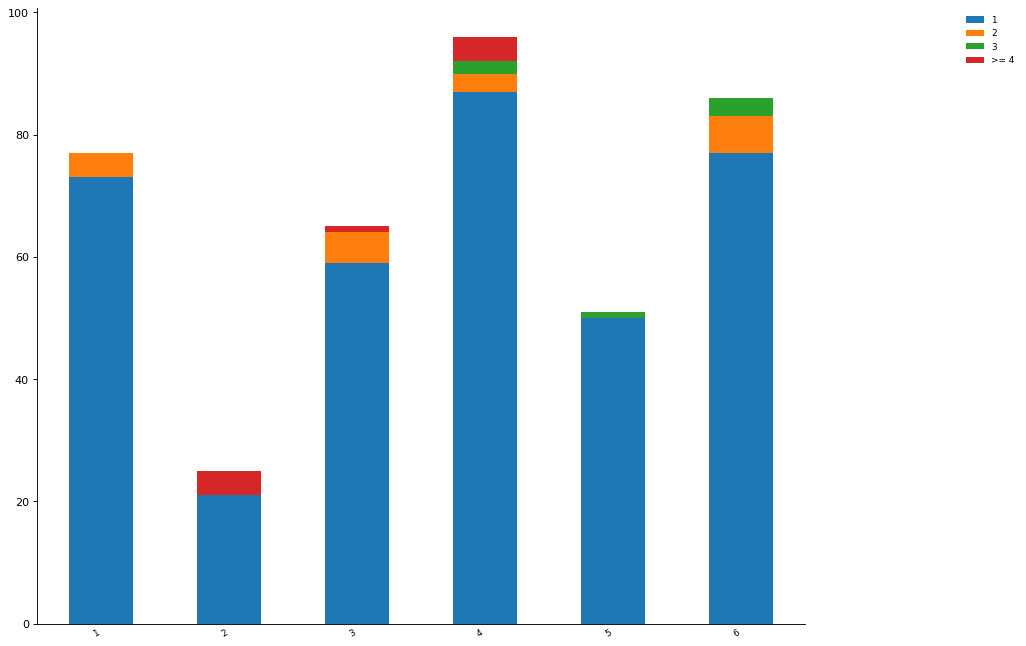

In [85]:
ir.pl.clonal_expansion(cd8tex, groupby="Timepoint", clip_at=4, normalize=False,fig_kws={"dpi": 80})

In [88]:
cd8tex1 = adata[adata.obs['new.ident'].isin(['CD8 TEX-1'])]
cd8tex2 = adata[adata.obs['new.ident'].isin(['CD8 TEX-2'])]
cd8tex2.obs



Unnamed: 0  nCount_RNA  nFeature_RNA  \
8      Timepoint_1_AAATGCCCAGCATGAG-1        2359          1075   
230    Timepoint_1_ATTTCTGGTACGCACC-1        3423          1433   
254    Timepoint_1_CACACAAAGATCACGG-1        2939          1339   
530    Timepoint_1_CTCGTCAGTCGACTAT-1        2957          1321   
699    Timepoint_1_GCTGCAGAGTACGACG-1        3269          1435   
...                               ...         ...           ...   
10493  Timepoint_6_TGGTTCCAGGTGTTAA-1        7637          2309   
10525  Timepoint_6_TTAGGCATCACAACGT-1        4930          1684   
10543  Timepoint_6_TTCTACACAGTCTTCC-1        3342          1251   
10572  Timepoint_6_TTGGAACCATGGTAGG-1        3718          1431   
10573  Timepoint_6_TTGGCAAAGCTAACTC-1        3290          1304   

       log10GenesPerUMI  percent_mito  percent_ribo  percent_hb   S.Score  \
8              0.898871      8.686441     24.110169    0.042373  0.037996   
230            0.893006      4.382121     24.569091    0.000000  0.048303   
254            0.901557      4.457298     22.388568    0.000000 -0.018643   
530            0.899175      5.715252     20.865742    0.000000  0.051562   
699            0.898310      5.963303     22.966361    0.000000  0.075145   
...                 ...           ...           ...         ...       ...   
10493          0.866209      5.839990     18.554406    0.000000 -0.005552   
10525          0.873673      1.724138     27.586207    0.000000  0.078428   
10543          0.878968      3.709243     32.904577    0.000000 -0.048214   
10572          0.883856      1.802044     26.681011    0.000000 -0.024178   
10573          0.885789      7.474932     27.073838    0.030386 -0.036464   

       G2M.Score Phase  nCount_SCT  nFeature_SCT  integrated_snn_res.0.8  \
8       0.041629   G2M        3223          1077                      11   
230     0.034231     S        3550          1433                      11   
254    -0.018266    G1        3349          1337                      11   
530     0.023064     S        3360          1319                      11   
699     0.015681     S        3481          1433                      11   
...          ...   ...         ...           ...                     ...   
10493   0.031712   G2M        4052          1947                      11   
10525  -0.062706     S        3780          1672                      11   
10543  -0.039292    G1        3306          1246                      11   
10572  -0.041115    G1        3464          1428                      11   
10573  -0.038369    G1        3281          1299                      11   

       seurat_clusters  new.ident  integrated_snn_res.1  Timepoint  \
8                   17  CD8 TEX-2                    14          1   
230                 17  CD8 TEX-2                    14          1   
254                 17  CD8 TEX-2                    14          1   
530                 17  CD8 TEX-2                    14          1   
699                 17  CD8 TEX-2                    14          1   
...                ...        ...                   ...        ...   
10493               17  CD8 TEX-2                    14          6   
10525               17  CD8 TEX-2                    14          6   
10543               17  CD8 TEX-2                    14          6   
10572               17  CD8 TEX-2                    14          6   
10573               17  CD8 TEX-2                    14          6   

      Disease_status Pembrolizumab iRAE                         cell_id  \
8                 HL            No   No  Timepoint_1_AAATGCCCAGCATGAG-1   
230               HL            No   No                             NaN   
254               HL            No   No  Timepoint_1_CACACAAAGATCACGG-1   
530               HL            No   No  Timepoint_1_CTCGTCAGTCGACTAT-1   
699               HL            No   No  Timepoint_1_GCTGCAGAGTACGACG-1   
...              ...           ...  ...                             ...   
10493        Relap

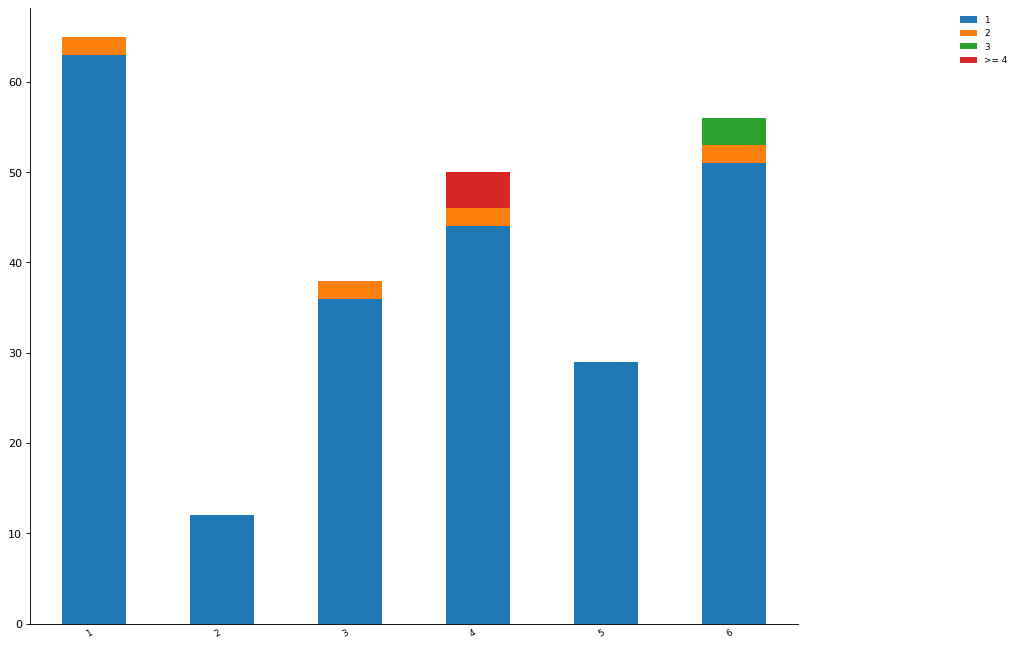

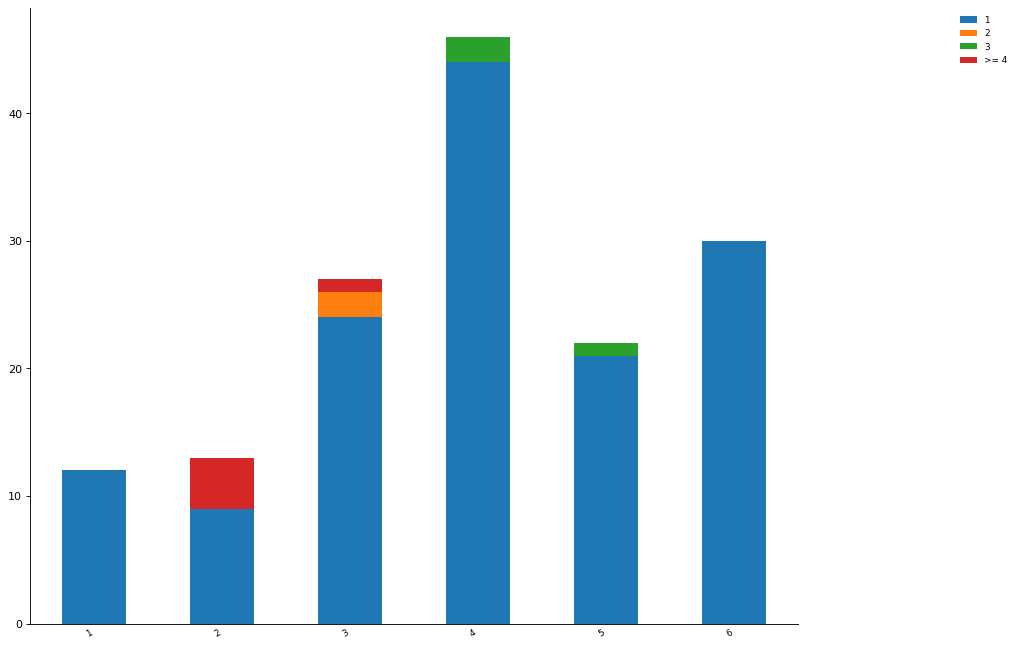

In [89]:
ir.pl.clonal_expansion(cd8tex1, groupby="Timepoint", clip_at=4, normalize=False,fig_kws={"dpi": 80})
ir.pl.clonal_expansion(cd8tex2, groupby="Timepoint", clip_at=4, normalize=False,fig_kws={"dpi": 80})


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


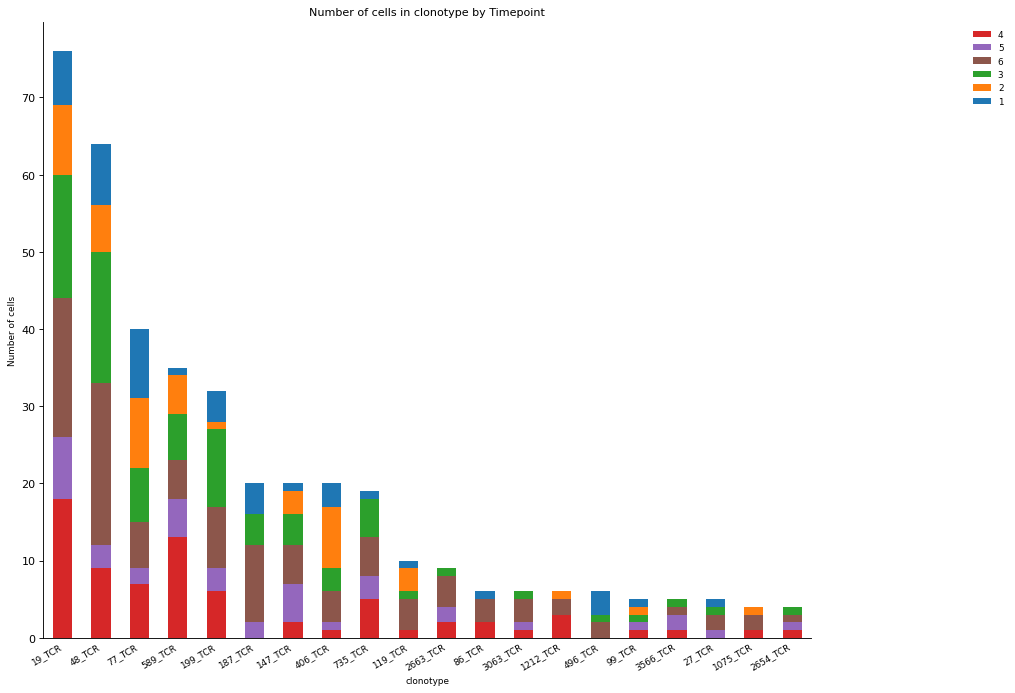

In [37]:
cdtem1 = adata[adata.obs['new.ident'].isin(['CD8 TEM-1'])]
ir.pl.group_abundance(cdtem1, groupby="clonotype", target_col="Timepoint", max_cols=20,fig_kws={"dpi": 80})